# Credit Card Fraud Detection
- Anonymized credit card transactions labeled as fraudulent or genuine
**Context**
- It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content**
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

- Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


## Exploratory Data Analysis

### Import data and check missing values

- Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

- Import file and preview

In [3]:
crecard = pd.read_csv("./data/creditcard.csv")
crecard.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  
5  0.105915  0.253844  0.081080    3.67      0  
6 -0.257237  0.034507  0.005168    4.99      0  
7 -0.051634 -1.206921 -1.085339   40.80      0  
8 -0.384157  0.011747  0.142404   93.20      0  
9  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 31 columns]

- Check if any missing values

In [4]:
print(f"\nTotal missing values: {crecard.isnull().sum().sum()}")


Total missing values: 0


- Univariate analysis

In [5]:
print(crecard.describe().round(3))

             Time          V1          V2          V3          V4          V5  \
count  284807.000  284807.000  284807.000  284807.000  284807.000  284807.000   
mean    94813.860       0.000       0.000      -0.000       0.000       0.000   
std     47488.146       1.959       1.651       1.516       1.416       1.380   
min         0.000     -56.408     -72.716     -48.326      -5.683    -113.743   
25%     54201.500      -0.920      -0.599      -0.890      -0.849      -0.692   
50%     84692.000       0.018       0.065       0.180      -0.020      -0.054   
75%    139320.500       1.316       0.804       1.027       0.743       0.612   
max    172792.000       2.455      22.058       9.383      16.875      34.802   

               V6          V7          V8          V9  ...         V21  \
count  284807.000  284807.000  284807.000  284807.000  ...  284807.000   
mean        0.000      -0.000       0.000      -0.000  ...       0.000   
std         1.332       1.237       1.194       

### Exploratory Data Analysis

- Plots for columns

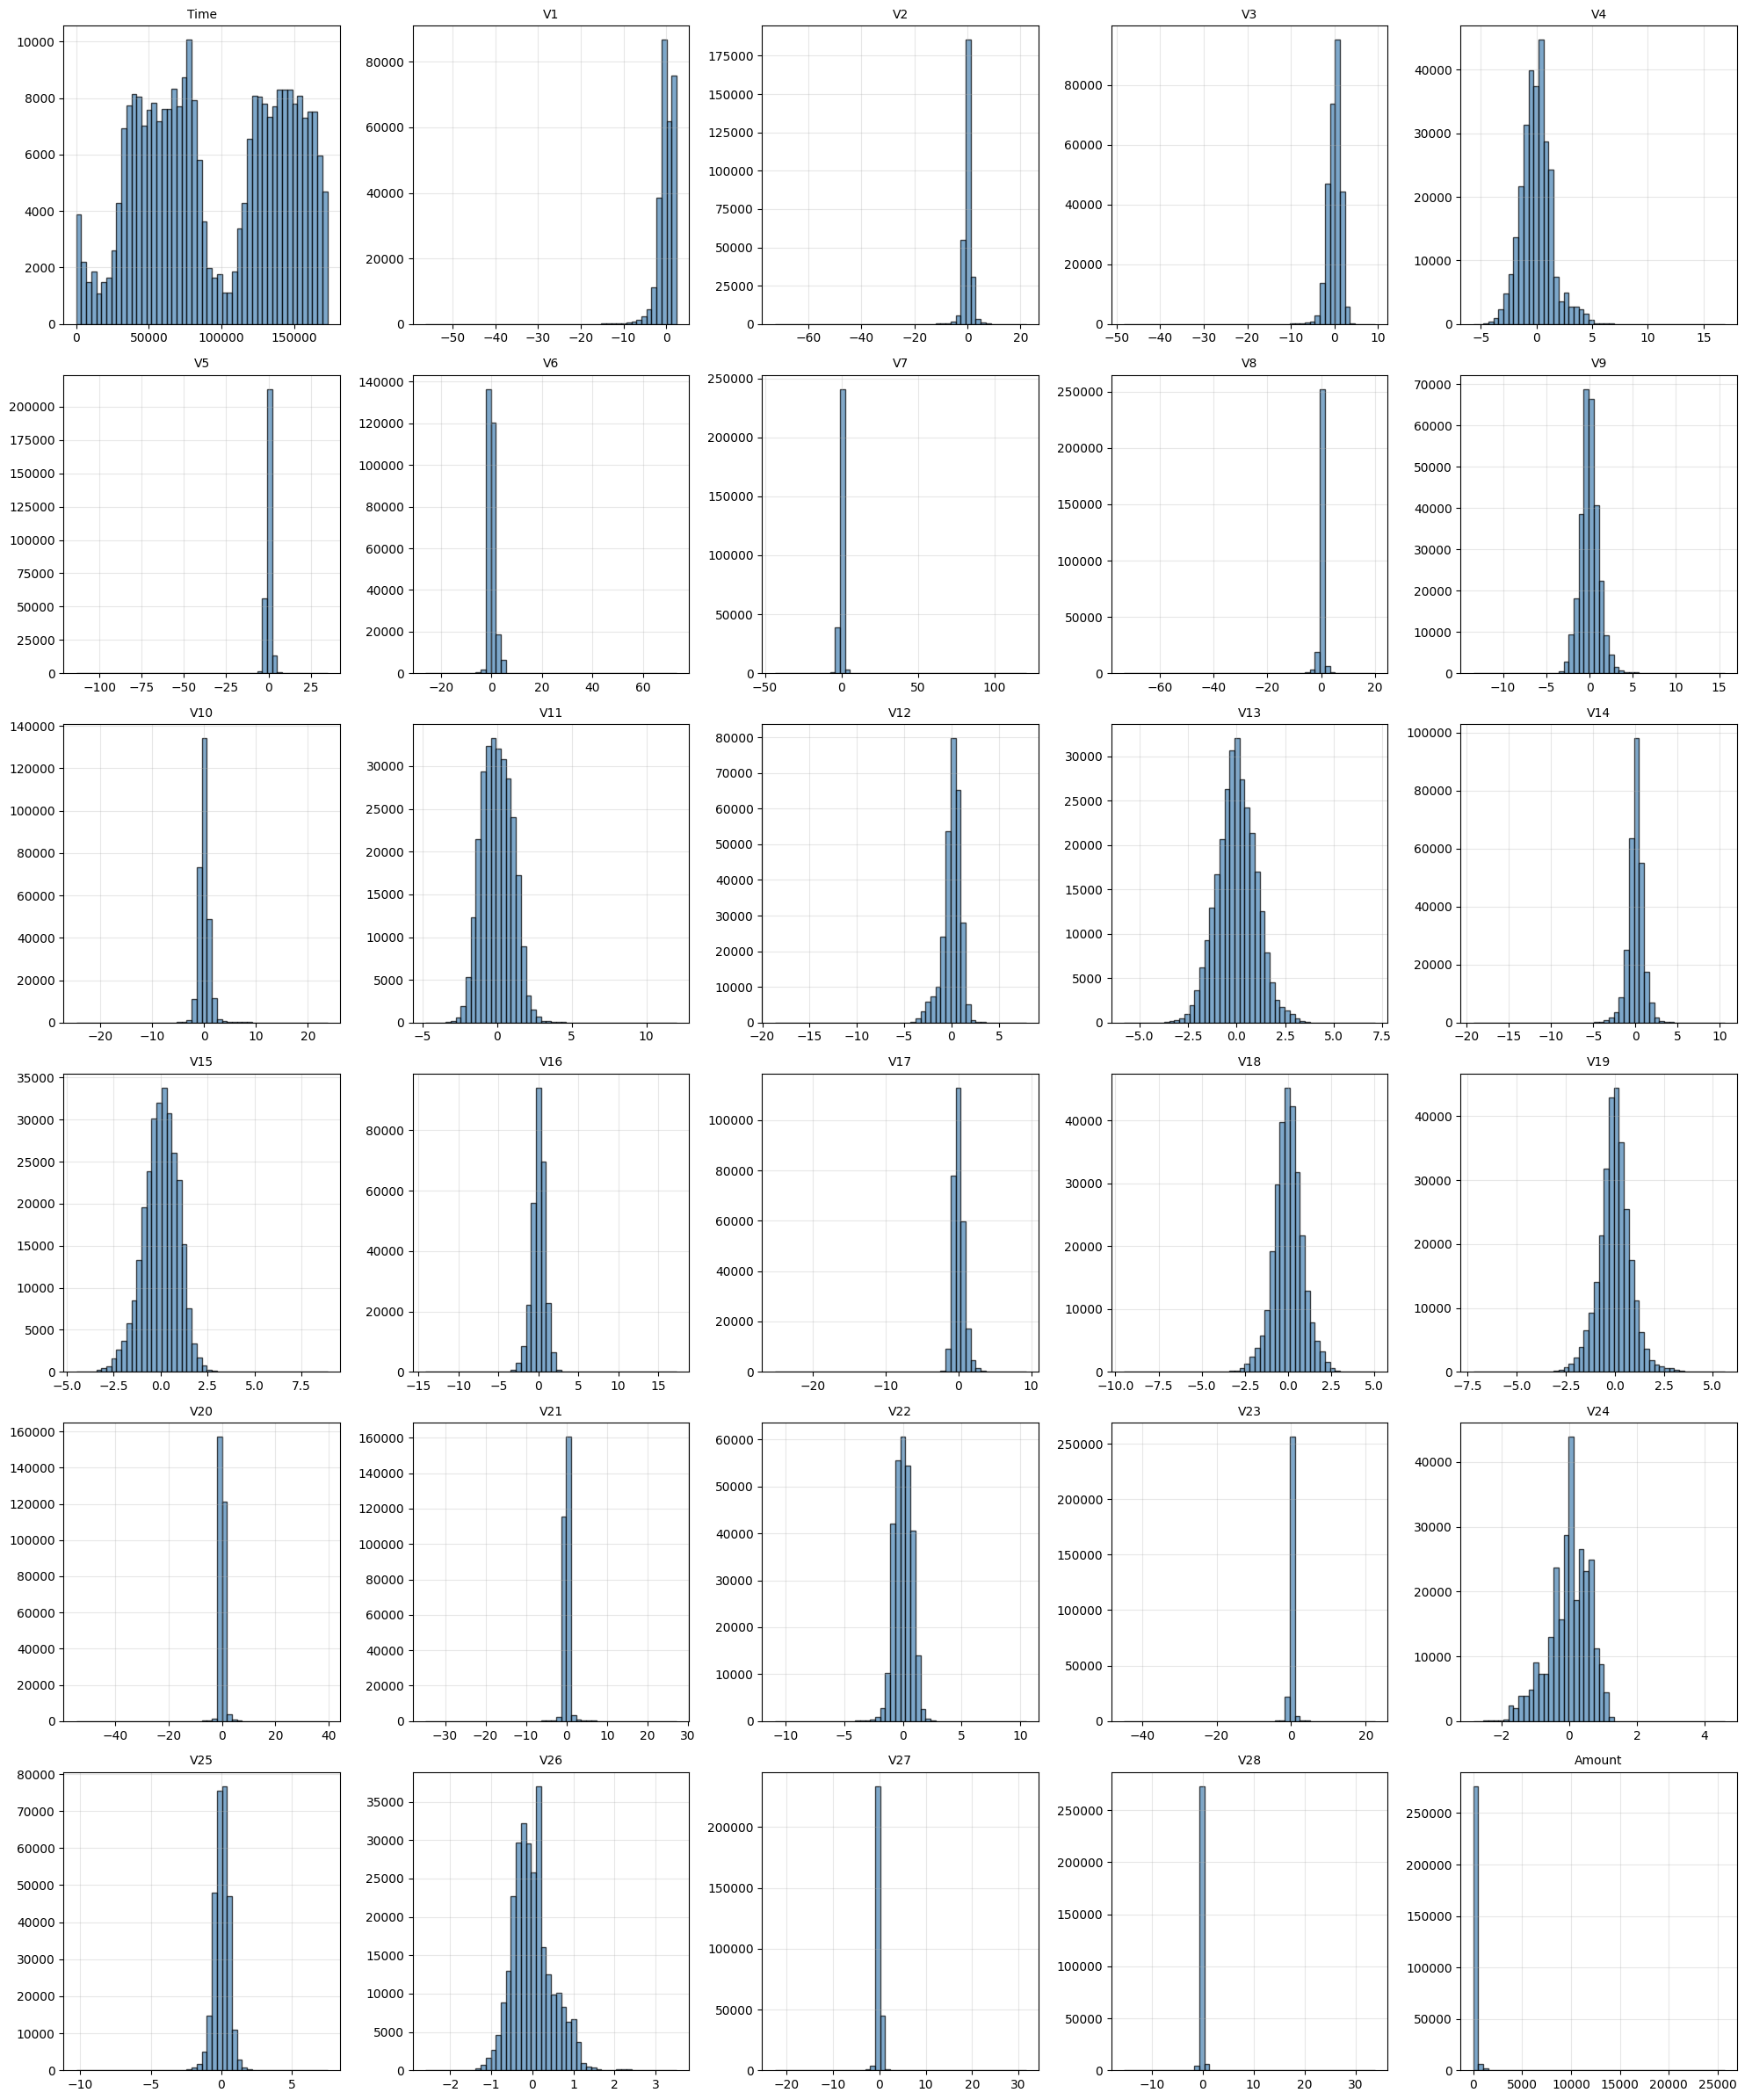

In [6]:
# Plot histograms for all variables
fig, axes = plt.subplots(6, 5, figsize=(20, 24))
axes = axes.ravel()

for idx, col in enumerate(crecard.columns):
    if idx < len(axes):
        axes[idx].hist(crecard[col], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
        axes[idx].set_title(f'{col}', fontsize=10)
        axes[idx].grid(True, alpha=0.3)

# Remove empty subplots
for idx in range(len(crecard.columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

- I will check the outliers of each variable from V1 to V28.

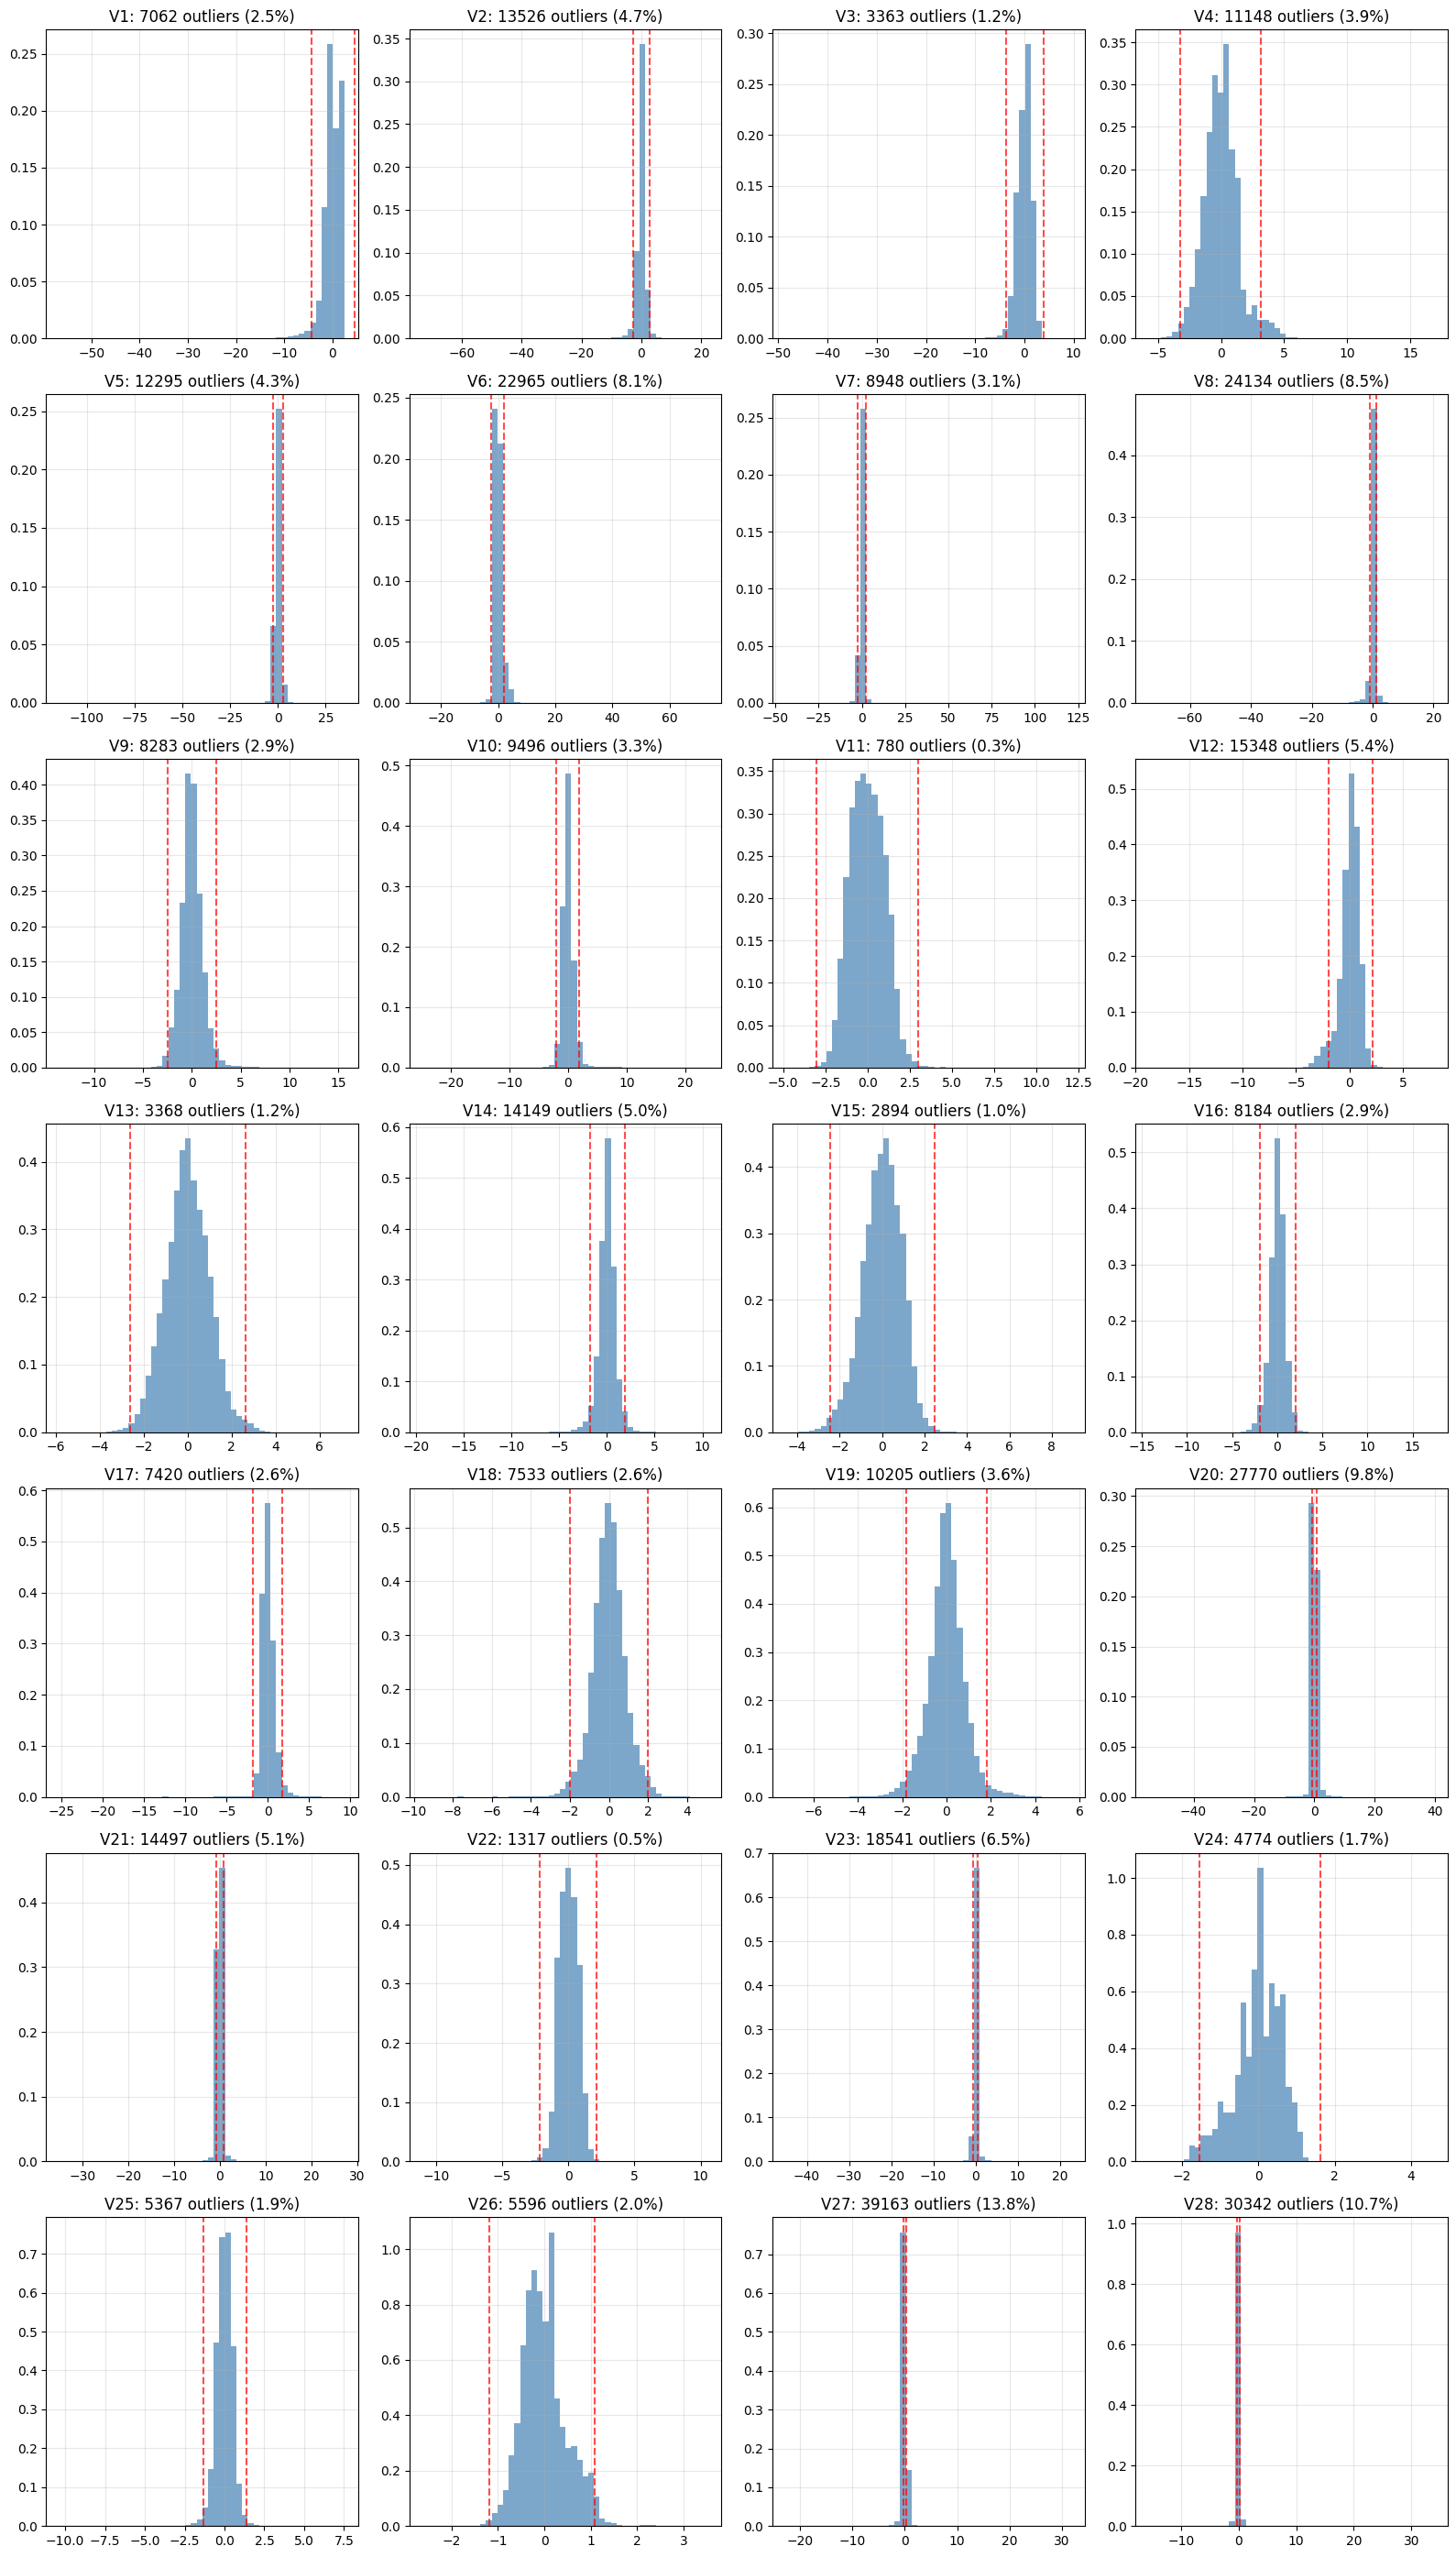

OUTLIER COUNTS (IQR METHOD):
----------------------------------------
V1 :  7,062 outliers ( 2.48%)
V2 : 13,526 outliers ( 4.75%)
V3 :  3,363 outliers ( 1.18%)
V4 : 11,148 outliers ( 3.91%)
V5 : 12,295 outliers ( 4.32%)
V6 : 22,965 outliers ( 8.06%)
V7 :  8,948 outliers ( 3.14%)
V8 : 24,134 outliers ( 8.47%)
V9 :  8,283 outliers ( 2.91%)
V10:  9,496 outliers ( 3.33%)
V11:    780 outliers ( 0.27%)
V12: 15,348 outliers ( 5.39%)
V13:  3,368 outliers ( 1.18%)
V14: 14,149 outliers ( 4.97%)
V15:  2,894 outliers ( 1.02%)
V16:  8,184 outliers ( 2.87%)
V17:  7,420 outliers ( 2.61%)
V18:  7,533 outliers ( 2.64%)
V19: 10,205 outliers ( 3.58%)
V20: 27,770 outliers ( 9.75%)
V21: 14,497 outliers ( 5.09%)
V22:  1,317 outliers ( 0.46%)
V23: 18,541 outliers ( 6.51%)
V24:  4,774 outliers ( 1.68%)
V25:  5,367 outliers ( 1.88%)
V26:  5,596 outliers ( 1.96%)
V27: 39,163 outliers (13.75%)
V28: 30,342 outliers (10.65%)

Total outliers across all V features: 338,468
Average outliers per feature: 12088


In [7]:
# Outlier analysis for V1-V28 using IQR method
v_columns = [f'V{i}' for i in range(1, 29)]
outlier_counts = {}
fig, axes = plt.subplots(7, 4, figsize=(16, 28))
axes = axes.ravel()

for idx, col in enumerate(v_columns):
    Q1 = crecard[col].quantile(0.25)
    Q3 = crecard[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = crecard[(crecard[col] < lower) | (crecard[col] > upper)]
    outlier_counts[col] = len(outliers)

    # Plot with outliers highlighted
    axes[idx].hist(crecard[col], bins=50, alpha=0.7, color='steelblue', density=True)
    axes[idx].axvline(lower, color='red', linestyle='--', alpha=0.7, label=f'Q1-1.5*IQR')
    axes[idx].axvline(upper, color='red', linestyle='--', alpha=0.7, label=f'Q3+1.5*IQR')
    axes[idx].set_title(f'{col}: {len(outliers)} outliers ({len(outliers)/len(crecard)*100:.1f}%)')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print outlier counts
print("OUTLIER COUNTS (IQR METHOD):")
print("-" * 40)
for col in v_columns:
    pct = outlier_counts[col] / len(crecard) * 100
    print(f"{col:3}: {outlier_counts[col]:6,} outliers ({pct:5.2f}%)")

print(f"\nTotal outliers across all V features: {sum(outlier_counts.values()):,}")
print(f"Average outliers per feature: {sum(outlier_counts.values())/28:.0f}")

- Check if fraud often appear in outliers

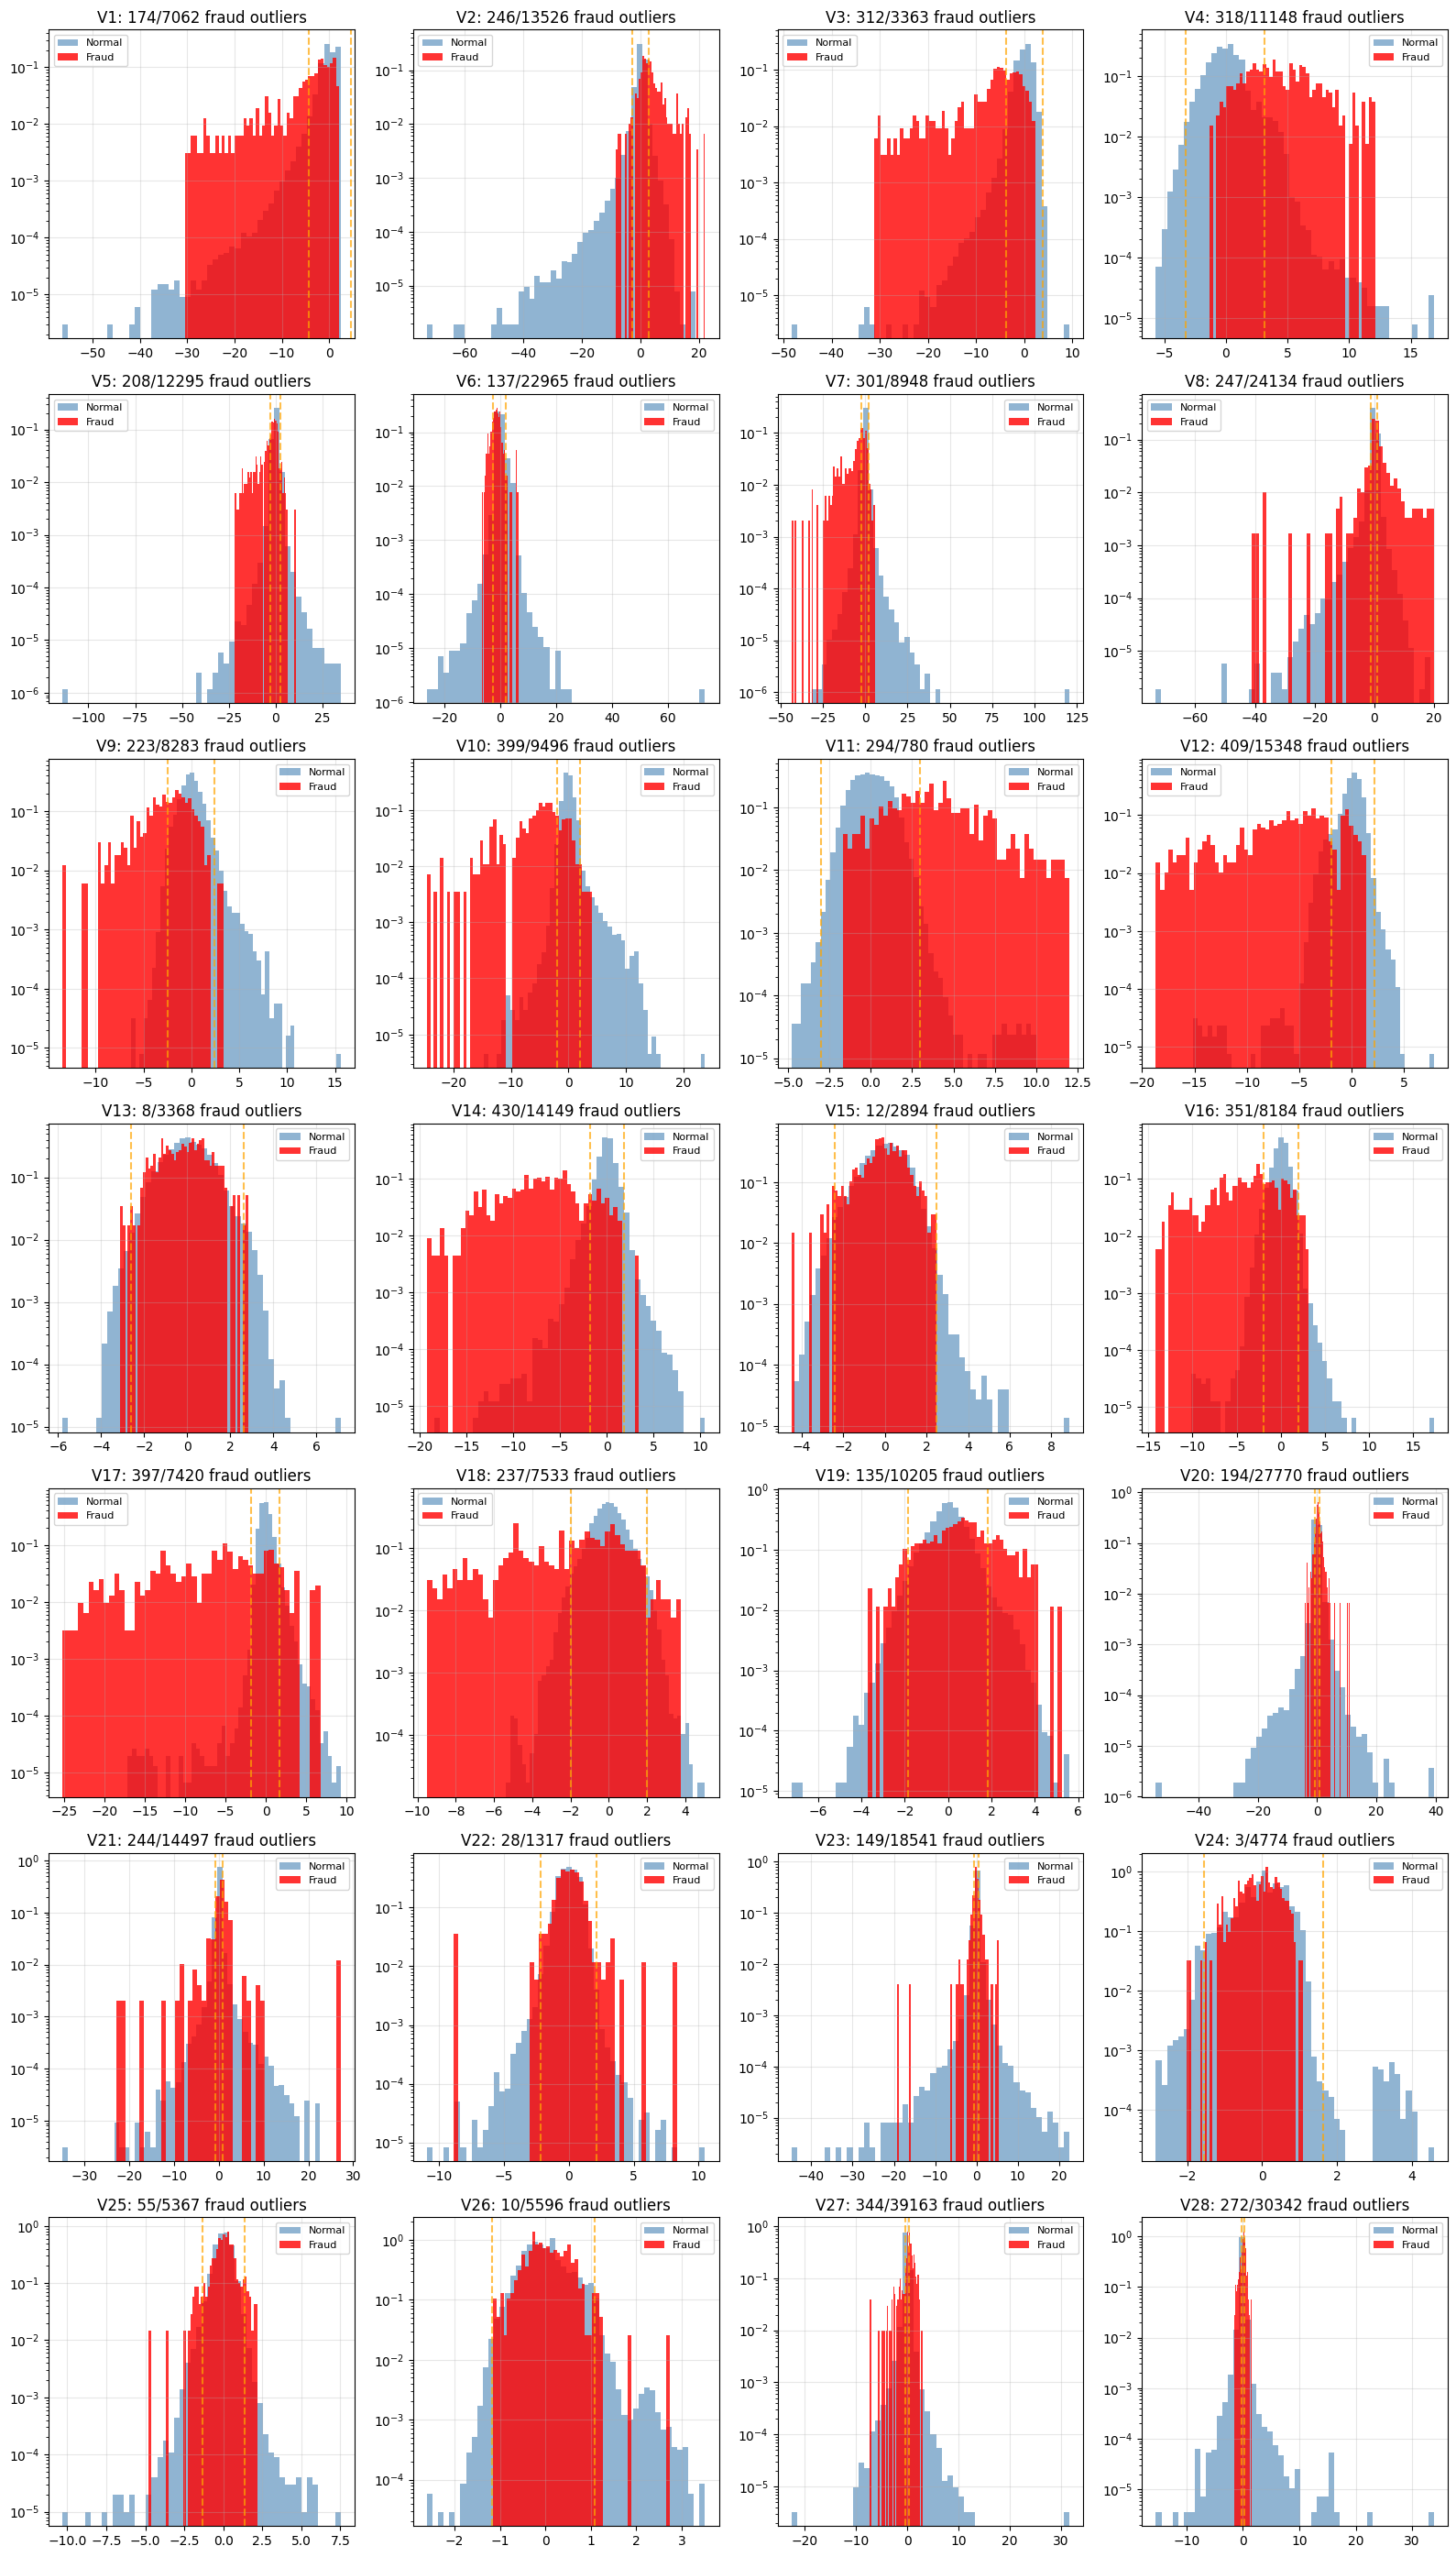

OUTLIER & FRAUD ANALYSIS (IQR METHOD):
------------------------------------------------------------
Var  Outliers Fraud_Out Fraud_%  Out_% 
------------------------------------------------------------
V1   7,062    174       2.5      2.48  
V2   13,526   246       1.8      4.75  
V3   3,363    312       9.3      1.18  
V4   11,148   318       2.9      3.91  
V5   12,295   208       1.7      4.32  
V6   22,965   137       0.6      8.06  
V7   8,948    301       3.4      3.14  
V8   24,134   247       1.0      8.47  
V9   8,283    223       2.7      2.91  
V10  9,496    399       4.2      3.33  
V11  780      294       37.7     0.27  
V12  15,348   409       2.7      5.39  
V13  3,368    8         0.2      1.18  
V14  14,149   430       3.0      4.97  
V15  2,894    12        0.4      1.02  
V16  8,184    351       4.3      2.87  
V17  7,420    397       5.4      2.61  
V18  7,533    237       3.1      2.64  
V19  10,205   135       1.3      3.58  
V20  27,770   194       0.7      9.75  

In [8]:
# Outlier analysis for V1-V28 using IQR method with fraud highlighting
v_columns = [f'V{i}' for i in range(1, 29)]
outlier_counts = {}
fraud_in_outliers = {}
fig, axes = plt.subplots(7, 4, figsize=(16, 28))
axes = axes.ravel()

for idx, col in enumerate(v_columns):
    Q1 = crecard[col].quantile(0.25)
    Q3 = crecard[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = crecard[(crecard[col] < lower) | (crecard[col] > upper)]
    outlier_counts[col] = len(outliers)
    fraud_in_outliers[col] = outliers['Class'].sum()

    # Separate normal and fraud data
    normal_data = crecard[crecard['Class'] == 0][col]
    fraud_data = crecard[crecard['Class'] == 1][col]

    # Plot with log scale and fraud highlighting
    axes[idx].hist(normal_data, bins=50, alpha=0.6, color='steelblue', density=True, label='Normal')
    axes[idx].hist(fraud_data, bins=50, alpha=0.8, color='red', density=True, label='Fraud')
    axes[idx].axvline(lower, color='orange', linestyle='--', alpha=0.7)
    axes[idx].axvline(upper, color='orange', linestyle='--', alpha=0.7)
    axes[idx].set_yscale('log')
    axes[idx].set_title(f'{col}: {fraud_in_outliers[col]}/{outlier_counts[col]} fraud outliers')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

# Print outlier and fraud analysis
print("OUTLIER & FRAUD ANALYSIS (IQR METHOD):")
print("-" * 60)
print(f"{'Var':<4} {'Outliers':<8} {'Fraud_Out':<9} {'Fraud_%':<8} {'Out_%':<6}")
print("-" * 60)

total_frauds = crecard['Class'].sum()
for col in v_columns:
    fraud_out = fraud_in_outliers[col]
    outlier_pct = outlier_counts[col] / len(crecard) * 100
    fraud_out_pct = fraud_out / outlier_counts[col] * 100 if outlier_counts[col] > 0 else 0
    print(f"{col:<4} {outlier_counts[col]:<8,} {fraud_out:<9} {fraud_out_pct:<8.1f} {outlier_pct:<6.2f}")

print(f"\nTotal frauds in outliers: {sum(fraud_in_outliers.values())}/{total_frauds} ({sum(fraud_in_outliers.values())/total_frauds*100:.1f}%)")
print(f"Average fraud rate in outliers: {sum(fraud_in_outliers.values())/sum(outlier_counts.values())*100:.2f}%")

- Analyze each variable


1. Amount

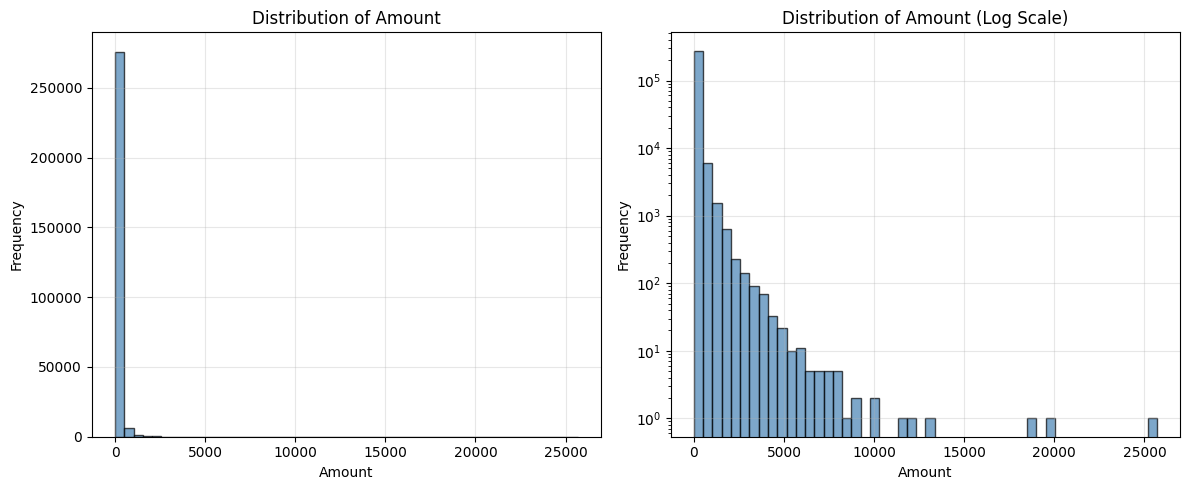

Amount statistics:
Min: 0.0
Max: 25691.16
Mean: 88.35
Median: 22.00
Transactions with Amount = 0: 1825


In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(crecard['Amount'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(crecard['Amount'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Distribution of Amount (Log Scale)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Amount statistics:")
print(f"Min: {crecard['Amount'].min()}")
print(f"Max: {crecard['Amount'].max()}")
print(f"Mean: {crecard['Amount'].mean():.2f}")
print(f"Median: {crecard['Amount'].median():.2f}")
print(f"Transactions with Amount = 0: {(crecard['Amount'] == 0).sum()}")

In [10]:
# Check fraud cases where Amount = 0
amount_zero = crecard[crecard['Amount'] == 0]
fraud_amount_zero = amount_zero[amount_zero['Class'] == 1]

print(f"Total transactions with Amount = 0: {len(amount_zero)}")
print(f"Fraud transactions with Amount = 0: {len(fraud_amount_zero)}")
print(f"Fraud rate in Amount = 0 transactions: {len(fraud_amount_zero)/len(amount_zero)*100:.2f}%")

if len(fraud_amount_zero) > 0:
    print(f"\nFraud transactions with Amount = 0:")
    print(fraud_amount_zero[['Time', 'Amount', 'Class']].head())

Total transactions with Amount = 0: 1825
Fraud transactions with Amount = 0: 27
Fraud rate in Amount = 0 transactions: 1.48%

Fraud transactions with Amount = 0:
          Time  Amount  Class
541      406.0     0.0      1
8842   12093.0     0.0      1
23308  32686.0     0.0      1
42756  41233.0     0.0      1
69980  53658.0     0.0      1


In [11]:
import seaborn as sns
from scipy import stats

# Detailed analysis of Amount column

print("=== DETAILED AMOUNT ANALYSIS ===\n")

# Basic statistics
print("1. BASIC STATISTICS:")
print(f"Total transactions: {len(crecard):,}")
print(f"Amount range: ${crecard['Amount'].min():.2f} - ${crecard['Amount'].max():,.2f}")
print(f"Mean: ${crecard['Amount'].mean():.2f}")
print(f"Median: ${crecard['Amount'].median():.2f}")
print(f"Standard deviation: ${crecard['Amount'].std():.2f}")
print(f"Skewness: {crecard['Amount'].skew():.2f}")
print(f"Kurtosis: {crecard['Amount'].kurtosis():.2f}")

# Percentiles
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99, 99.5, 99.9]
print(f"\n2. PERCENTILES:")
for p in percentiles:
    value = np.percentile(crecard['Amount'], p)
    print(f"{p:5.1f}%: ${value:8.2f}")

# Zero amount analysis
zero_count = (crecard['Amount'] == 0).sum()
print(f"\n3. ZERO AMOUNT TRANSACTIONS:")
print(f"Count: {zero_count:,} ({zero_count/len(crecard)*100:.2f}%)")
print(f"Fraud rate in zero amounts: {len(fraud_amount_zero)/zero_count*100:.2f}%")

# Outlier detection using IQR
Q1 = crecard['Amount'].quantile(0.25)
Q3 = crecard['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = crecard[(crecard['Amount'] < lower_bound) | (crecard['Amount'] > upper_bound)]
print(f"\n4. OUTLIERS (IQR METHOD):")
print(f"IQR: ${IQR:.2f}")
print(f"Lower bound: ${lower_bound:.2f}")
print(f"Upper bound: ${upper_bound:.2f}")
print(f"Outliers: {len(outliers_iqr):,} ({len(outliers_iqr)/len(crecard)*100:.2f}%)")

# High-value transactions
high_value_threshold = 1000
high_value = crecard[crecard['Amount'] > high_value_threshold]
print(f"\n5. HIGH-VALUE TRANSACTIONS (>${high_value_threshold}):")
print(f"Count: {len(high_value):,} ({len(high_value)/len(crecard)*100:.2f}%)")
print(f"Fraud rate: {(high_value['Class'] == 1).sum()/len(high_value)*100:.2f}%")

# Amount distribution by class
print(f"\n6. AMOUNT BY CLASS:")
for class_val in [0, 1]:
    class_data = crecard[crecard['Class'] == class_val]['Amount']
    print(f"Class {class_val} ({'Normal' if class_val == 0 else 'Fraud'}):")
    print(f"  Count: {len(class_data):,}")
    print(f"  Mean: ${class_data.mean():.2f}")
    print(f"  Median: ${class_data.median():.2f}")
    print(f"  Max: ${class_data.max():.2f}")

=== DETAILED AMOUNT ANALYSIS ===

1. BASIC STATISTICS:
Total transactions: 284,807
Amount range: $0.00 - $25,691.16
Mean: $88.35
Median: $22.00
Standard deviation: $250.12
Skewness: 16.98
Kurtosis: 845.09

2. PERCENTILES:
  1.0%: $    0.12
  5.0%: $    0.92
 10.0%: $    1.00
 25.0%: $    5.60
 50.0%: $   22.00
 75.0%: $   77.16
 90.0%: $  203.00
 95.0%: $  365.00
 99.0%: $ 1017.97
 99.5%: $ 1456.99
 99.9%: $ 3000.00

3. ZERO AMOUNT TRANSACTIONS:
Count: 1,825 (0.64%)
Fraud rate in zero amounts: 1.48%

4. OUTLIERS (IQR METHOD):
IQR: $71.56
Lower bound: $-101.75
Upper bound: $184.51
Outliers: 31,904 (11.20%)

5. HIGH-VALUE TRANSACTIONS (>$1000):
Count: 2,940 (1.03%)
Fraud rate: 0.31%

6. AMOUNT BY CLASS:
Class 0 (Normal):
  Count: 284,315
  Mean: $88.29
  Median: $22.00
  Max: $25691.16
Class 1 (Fraud):
  Count: 492
  Mean: $122.21
  Median: $9.25
  Max: $2125.87


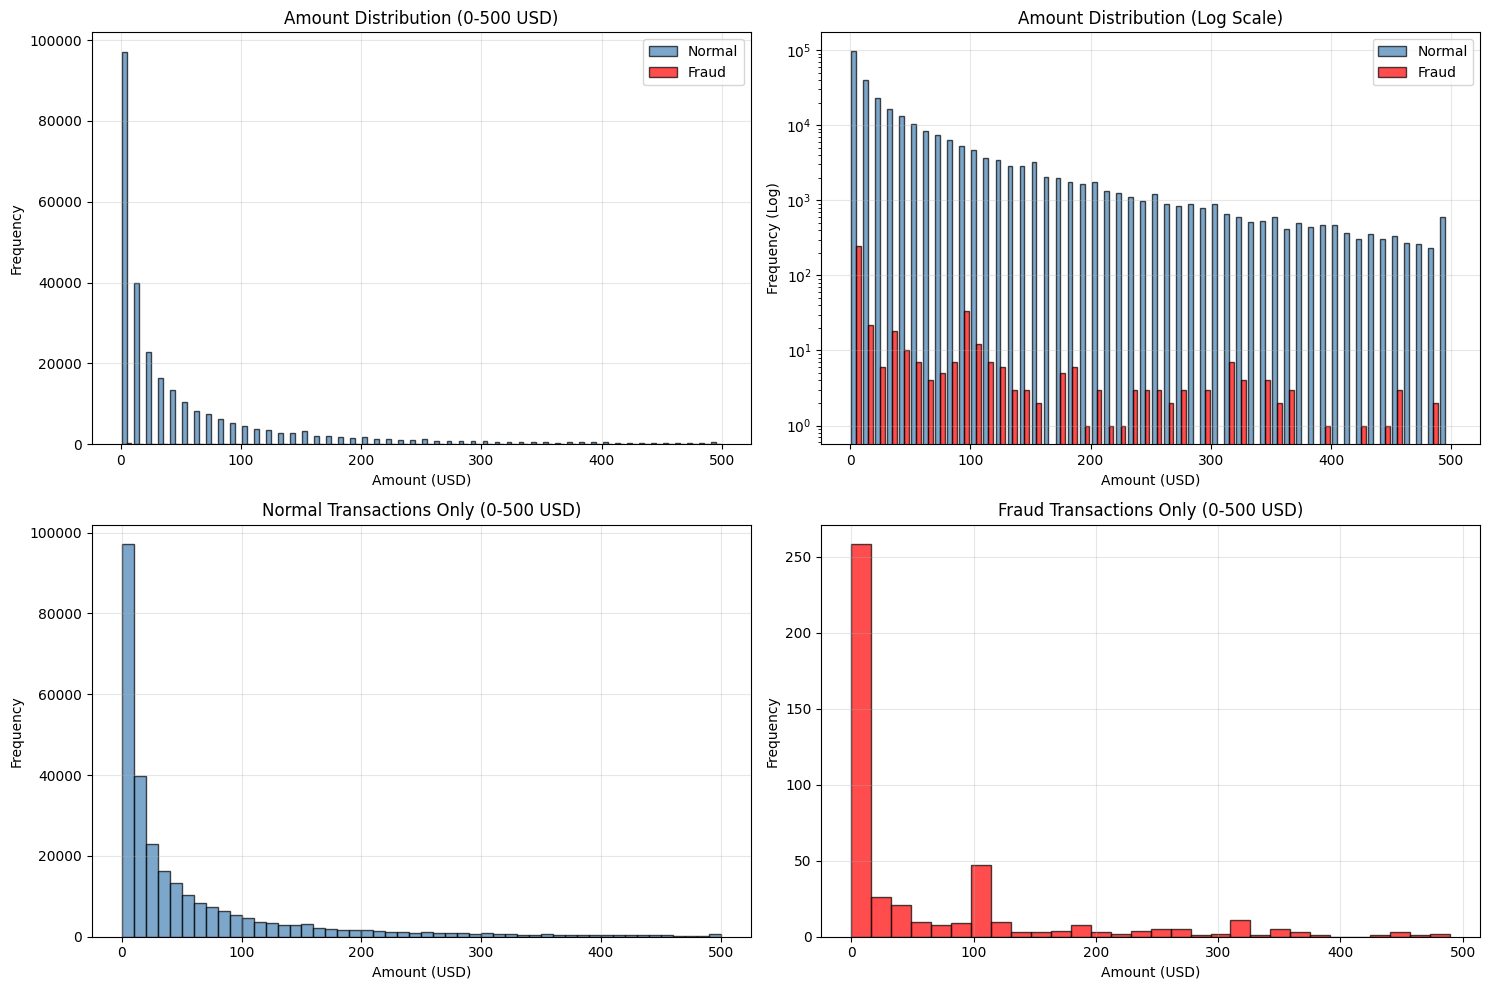

Transactions in 0-500 USD range:
Total: 275,665 (96.8% of all transactions)
Normal: 275,208
Fraud: 457
Fraud rate in this range: 0.17%


In [12]:
plt.figure(figsize=(15, 10))

# Filter data for 0-500 USD range
amount_range = crecard[crecard['Amount'] <= 500]
normal_range = amount_range[amount_range['Class'] == 0]['Amount']
fraud_range = amount_range[amount_range['Class'] == 1]['Amount']

# Create subplots
plt.subplot(2, 2, 1)
plt.hist([normal_range, fraud_range], bins=50, alpha=0.7,
         color=['steelblue', 'red'], label=['Normal', 'Fraud'], edgecolor='black')
plt.title('Amount Distribution (0-500 USD)')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.hist([normal_range, fraud_range], bins=50, alpha=0.7,
         color=['steelblue', 'red'], label=['Normal', 'Fraud'], edgecolor='black')
plt.title('Amount Distribution (Log Scale)')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency (Log)')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.hist(normal_range, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Normal Transactions Only (0-500 USD)')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.hist(fraud_range, bins=30, alpha=0.7, color='red', edgecolor='black')
plt.title('Fraud Transactions Only (0-500 USD)')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Transactions in 0-500 USD range:")
print(f"Total: {len(amount_range):,} ({len(amount_range)/len(crecard)*100:.1f}% of all transactions)")
print(f"Normal: {len(normal_range):,}")
print(f"Fraud: {len(fraud_range):,}")
print(f"Fraud rate in this range: {len(fraud_range)/len(amount_range)*100:.2f}%")

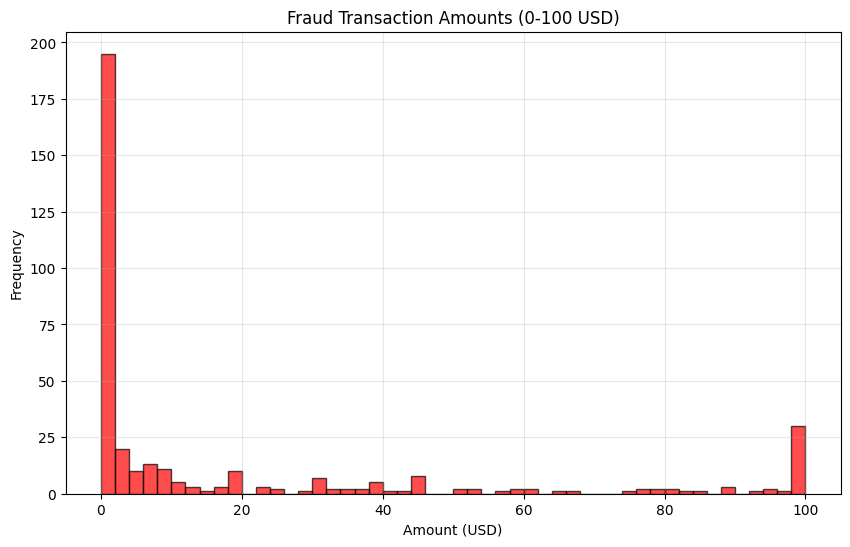

Fraud transactions in 0-100 USD range: 362
Percentage of all frauds: 73.6%


In [13]:
plt.figure(figsize=(10, 6))
fraud_amounts_0_100 = crecard[(crecard['Class'] == 1) & (crecard['Amount'] <= 100)]['Amount']
plt.hist(fraud_amounts_0_100, bins=50, alpha=0.7, color='red', edgecolor='black')
plt.title('Fraud Transaction Amounts (0-100 USD)')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Fraud transactions in 0-100 USD range: {len(fraud_amounts_0_100)}")
print(f"Percentage of all frauds: {len(fraud_amounts_0_100)/492*100:.1f}%")

Amount-Fraud correlation: 0.0056


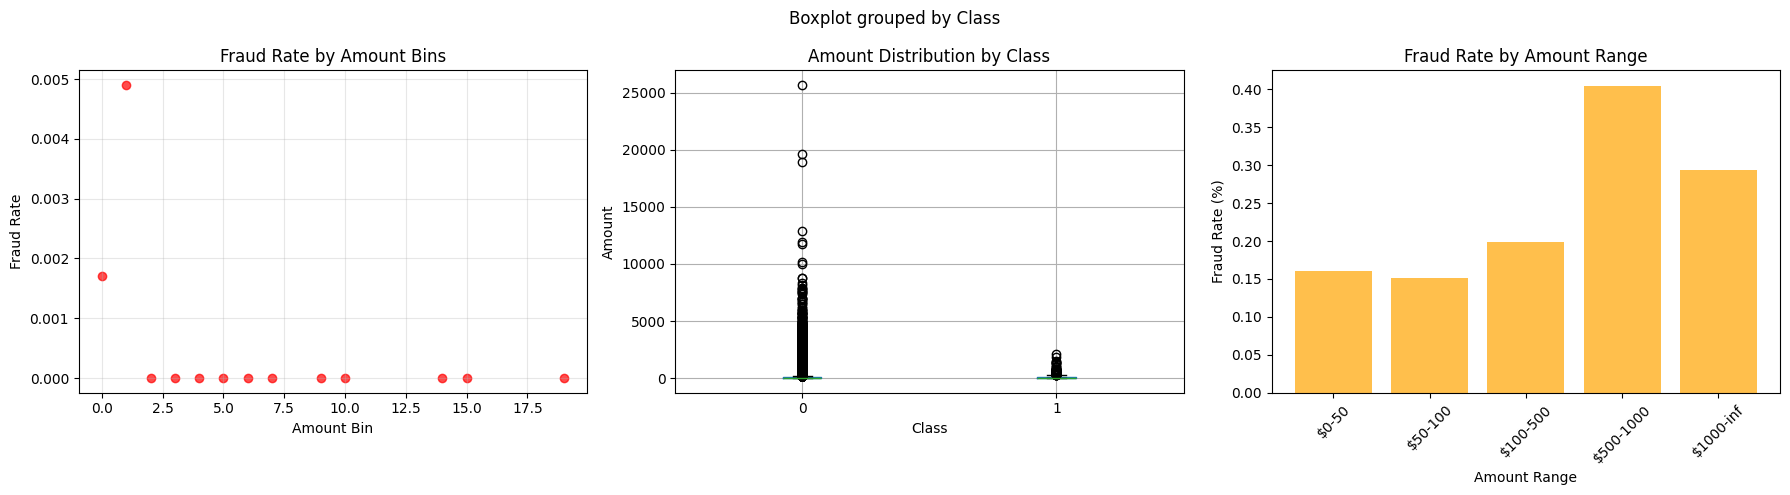


Fraud rate by amount ranges:
$   0-  50: 0.161%
$  50- 100: 0.151%
$ 100- 500: 0.198%
$ 500-1000: 0.405%
$1000- inf: 0.293%


In [14]:
# Correlation between Amount and Fraud Frequency
import seaborn as sns

# Create amount bins for correlation analysis
crecard['Amount_bin'] = pd.cut(crecard['Amount'], bins=20, labels=False)
corr_data = crecard.groupby('Amount_bin').agg({
    'Class': ['count', 'sum', 'mean']
}).round(4)
corr_data.columns = ['total', 'fraud_count', 'fraud_rate']

# Correlation coefficient
amount_fraud_corr = crecard['Amount'].corr(crecard['Class'])
print(f"Amount-Fraud correlation: {amount_fraud_corr:.4f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Amount vs Fraud Rate by bins
axes[0].scatter(corr_data.index, corr_data['fraud_rate'], alpha=0.7, color='red')
axes[0].set_title('Fraud Rate by Amount Bins')
axes[0].set_xlabel('Amount Bin')
axes[0].set_ylabel('Fraud Rate')
axes[0].grid(True, alpha=0.3)

# Box plot: Amount distribution by Class
crecard.boxplot(column='Amount', by='Class', ax=axes[1])
axes[1].set_title('Amount Distribution by Class')
axes[1].set_ylabel('Amount')

# Fraud count by amount ranges
amount_ranges = [(0, 50), (50, 100), (100, 500), (500, 1000), (1000, float('inf'))]
range_stats = []
for low, high in amount_ranges:
    mask = (crecard['Amount'] >= low) & (crecard['Amount'] < high)
    subset = crecard[mask]
    fraud_rate = subset['Class'].mean() * 100
    range_stats.append(fraud_rate)

axes[2].bar(range(len(amount_ranges)), range_stats, alpha=0.7, color='orange')
axes[2].set_title('Fraud Rate by Amount Range')
axes[2].set_xlabel('Amount Range')
axes[2].set_ylabel('Fraud Rate (%)')
axes[2].set_xticks(range(len(amount_ranges)))
axes[2].set_xticklabels([f'${low}-{high}' for low, high in amount_ranges], rotation=45)

plt.tight_layout()
plt.show()

# Statistical summary
print(f"\nFraud rate by amount ranges:")
for i, (low, high) in enumerate(amount_ranges):
    print(f"${low:4.0f}-{high:>4}: {range_stats[i]:.3f}%")  

In [15]:
# Calculate total transaction amounts by class
normal_total = crecard[crecard['Class'] == 0]['Amount'].sum()
fraud_total = crecard[crecard['Class'] == 1]['Amount'].sum()

print(f"Normal transactions total: ${normal_total:,.2f}")
print(f"Fraud transactions total: ${fraud_total:,.2f}")
print(f"Fraud percentage of total amount: {fraud_total/(normal_total + fraud_total)*100:.2f}%")

Normal transactions total: $25,102,462.04
Fraud transactions total: $60,127.97
Fraud percentage of total amount: 0.24%


- Time

In [16]:
# Convert Time to hour of day (0-23)
crecard['Hour'] = ((crecard['Time'] / 3600) % 24).astype(int)

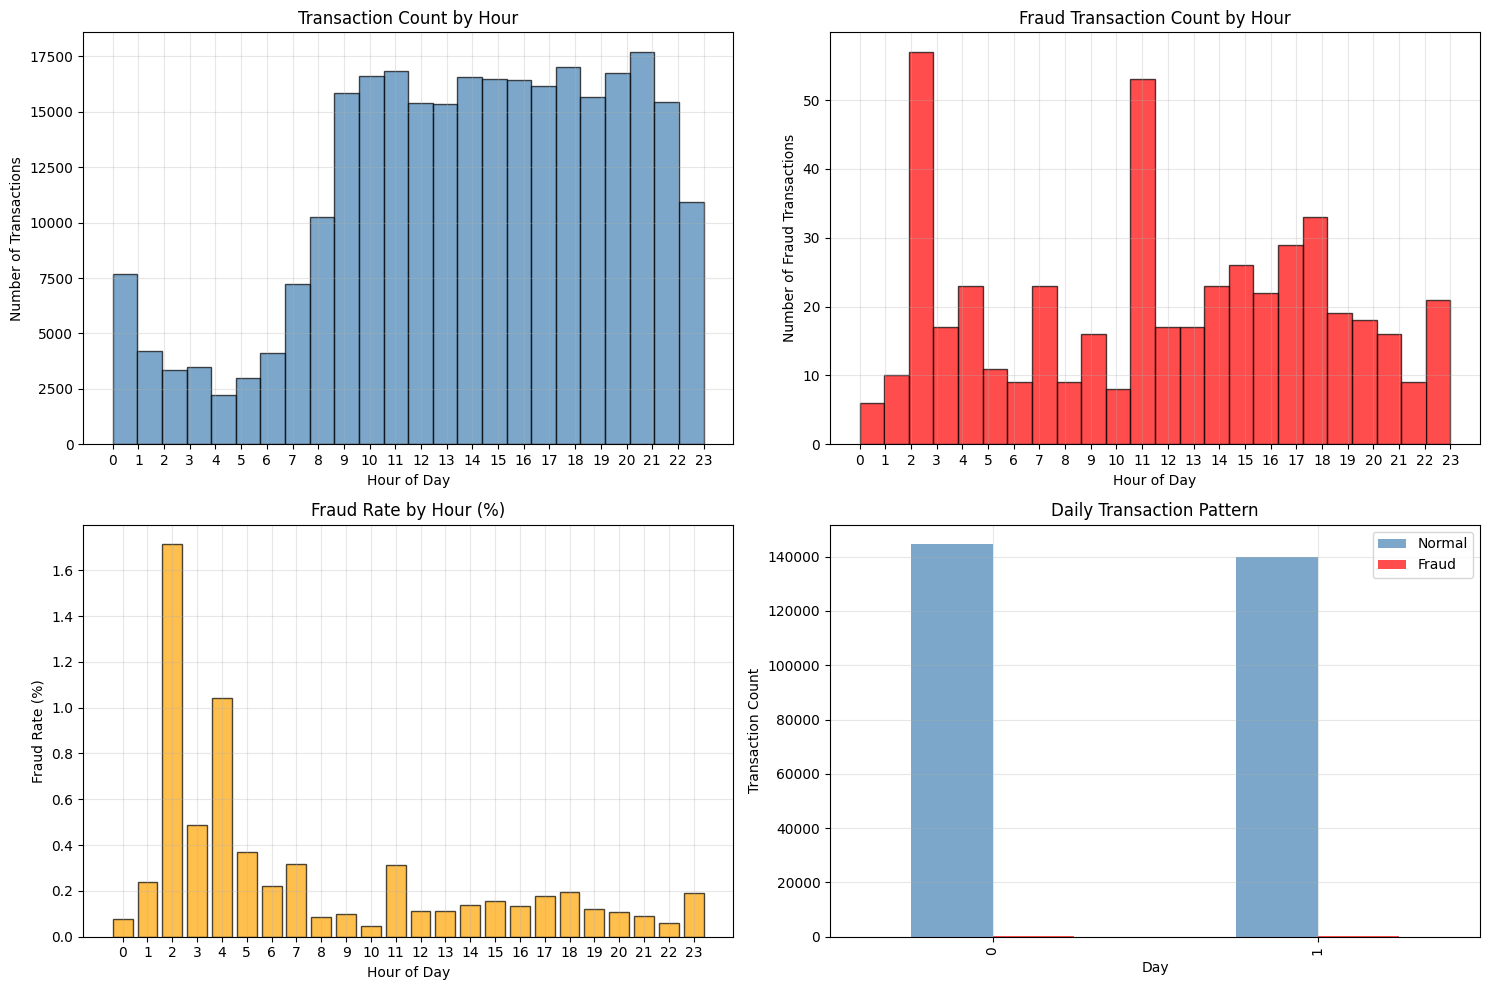

In [17]:
# Plot 1: Transaction count by hour
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(crecard['Hour'], bins=24, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Transaction Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)

# Plot 2: Fraud transaction count by hour
plt.subplot(2, 2, 2)
fraud_hours = crecard[crecard['Class'] == 1]['Hour']
plt.hist(fraud_hours, bins=24, alpha=0.7, color='red', edgecolor='black')
plt.title('Fraud Transaction Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)

# Plot 3: Fraud rate by hour
plt.subplot(2, 2, 3)
hourly_stats = crecard.groupby('Hour').agg({
    'Class': ['count', 'sum']
}).round(4)
hourly_stats.columns = ['total', 'fraud']
hourly_stats['fraud_rate'] = hourly_stats['fraud'] / hourly_stats['total'] * 100

plt.bar(hourly_stats.index, hourly_stats['fraud_rate'], alpha=0.7, color='orange', edgecolor='black')
plt.title('Fraud Rate by Hour (%)')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate (%)')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)

# Plot 4: Time series pattern (fraud vs normal over days)
plt.subplot(2, 2, 4)
crecard['Day'] = (crecard['Time'] // 86400).astype(int)
daily_stats = crecard.groupby(['Day', 'Class']).size().unstack(fill_value=0)
daily_stats.plot(kind='bar', color=['steelblue', 'red'], alpha=0.7, ax=plt.gca())
plt.title('Daily Transaction Pattern')
plt.xlabel('Day')
plt.ylabel('Transaction Count')
plt.legend(['Normal', 'Fraud'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

TRANSACTION COMPARISON DAY 1 vs DAY 2
Day 1: 144,786 transactions (281 frauds)
Day 2: 140,021 transactions (211 frauds)
Ratio Day2/Day1: 0.967
Hourly pattern correlation: 0.9609


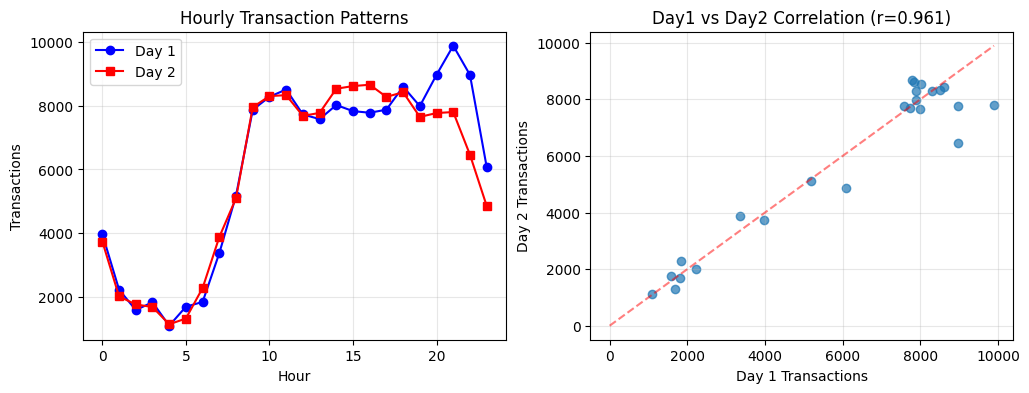

In [18]:
# Compare transaction patterns between Day 1 and Day 2
day1 = crecard[crecard['Day'] == 0]
day2 = crecard[crecard['Day'] == 1]

# Basic comparison
print("TRANSACTION COMPARISON DAY 1 vs DAY 2")
print(f"Day 1: {len(day1):,} transactions ({day1['Class'].sum()} frauds)")
print(f"Day 2: {len(day2):,} transactions ({day2['Class'].sum()} frauds)")
print(f"Ratio Day2/Day1: {len(day2)/len(day1):.3f}")

# Hourly correlation
day1_hourly = day1.groupby('Hour').size()
day2_hourly = day2.groupby('Hour').size()
correlation = day1_hourly.corr(day2_hourly)
print(f"Hourly pattern correlation: {correlation:.4f}")

# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(day1_hourly.index, day1_hourly.values, 'b-', label='Day 1', marker='o')
plt.plot(day2_hourly.index, day2_hourly.values, 'r-', label='Day 2', marker='s')
plt.title('Hourly Transaction Patterns')
plt.xlabel('Hour')
plt.ylabel('Transactions')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(day1_hourly.values, day2_hourly.values, alpha=0.7)
plt.plot([0, max(day1_hourly.values)], [0, max(day1_hourly.values)], 'r--', alpha=0.5)
plt.title(f'Day1 vs Day2 Correlation (r={correlation:.3f})')
plt.xlabel('Day 1 Transactions')
plt.ylabel('Day 2 Transactions')
plt.grid(True, alpha=0.3)

Hourly correlation: 0.0779 (p=0.7176)
Daily correlation: 1.0000 (p=1.0000)


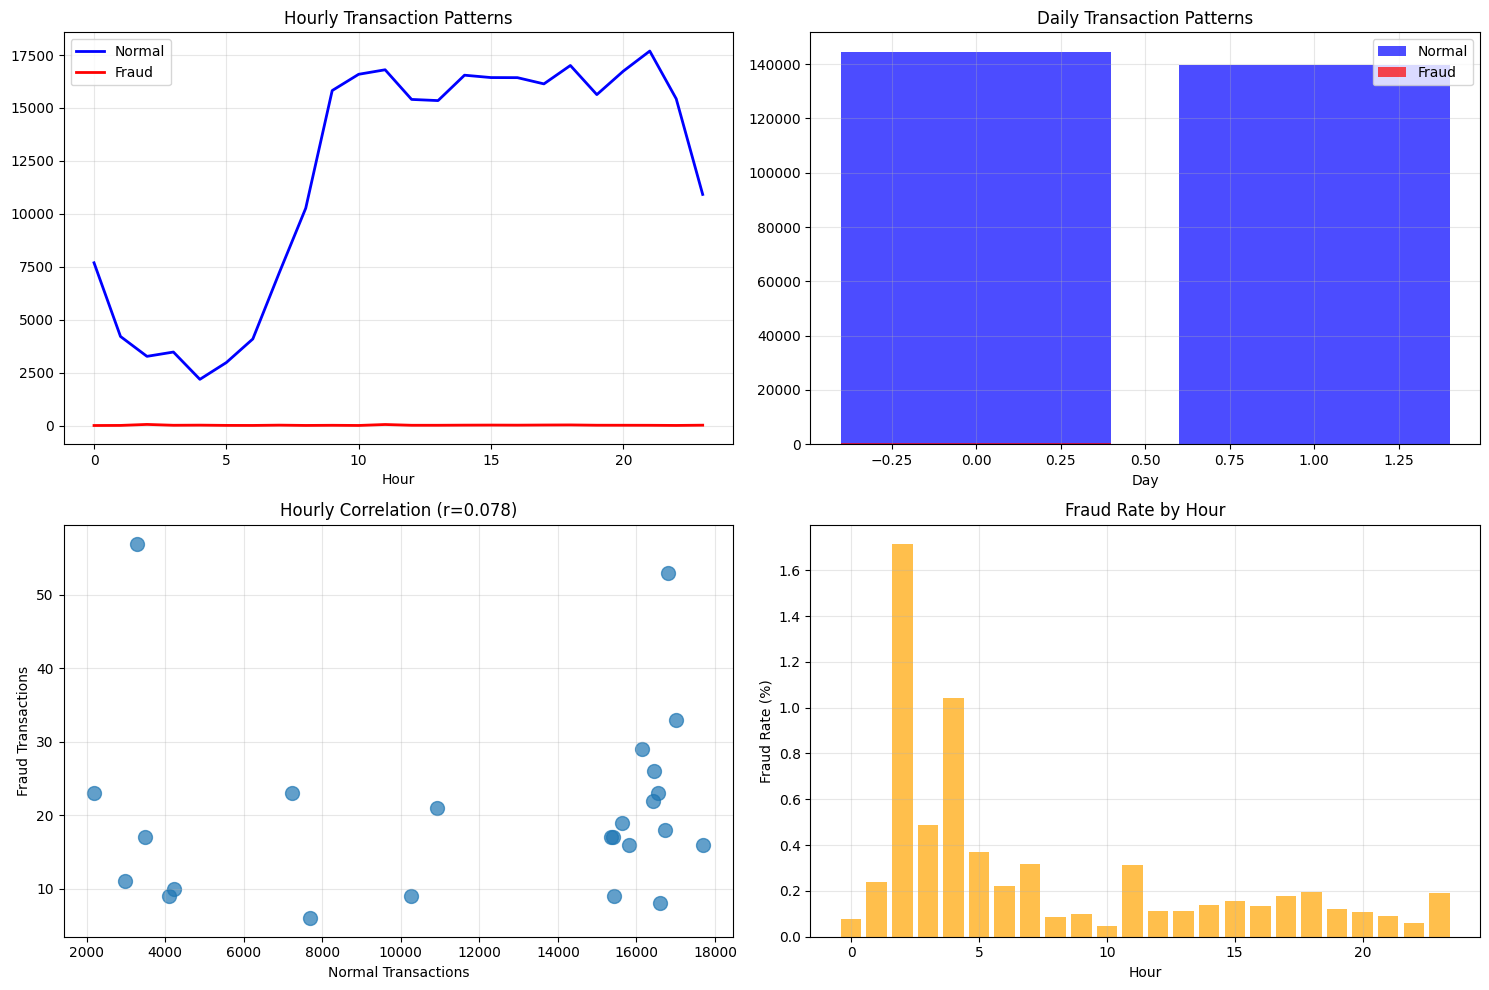


Peak fraud hours: [2, 11, 18]
Peak normal hours: [21, 18, 11]
Highest fraud rate hours: [2, 4, 3]


In [19]:
# Time-based fraud vs normal correlation analysis
from scipy.stats import pearsonr

# Hourly patterns
normal_hourly = crecard[crecard['Class'] == 0].groupby('Hour').size()
fraud_hourly = crecard[crecard['Class'] == 1].groupby('Hour').size()

# Daily patterns
normal_daily = crecard[crecard['Class'] == 0].groupby('Day').size()
fraud_daily = crecard[crecard['Class'] == 1].groupby('Day').size()

# Correlations
hour_corr, hour_p = pearsonr(normal_hourly, fraud_hourly)
day_corr, day_p = pearsonr(normal_daily, fraud_daily)

print(f"Hourly correlation: {hour_corr:.4f} (p={hour_p:.4f})")
print(f"Daily correlation: {day_corr:.4f} (p={day_p:.4f})")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Hourly patterns
axes[0,0].plot(normal_hourly.index, normal_hourly.values, 'b-', label='Normal', linewidth=2)
axes[0,0].plot(fraud_hourly.index, fraud_hourly.values, 'r-', label='Fraud', linewidth=2)
axes[0,0].set_title('Hourly Transaction Patterns')
axes[0,0].set_xlabel('Hour')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Daily patterns
axes[0,1].bar(normal_daily.index, normal_daily.values, alpha=0.7, color='blue', label='Normal')
axes[0,1].bar(fraud_daily.index, fraud_daily.values, alpha=0.7, color='red', label='Fraud')
axes[0,1].set_title('Daily Transaction Patterns')
axes[0,1].set_xlabel('Day')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Hourly correlation scatter
axes[1,0].scatter(normal_hourly, fraud_hourly, alpha=0.7, s=100)
axes[1,0].set_title(f'Hourly Correlation (r={hour_corr:.3f})')
axes[1,0].set_xlabel('Normal Transactions')
axes[1,0].set_ylabel('Fraud Transactions')
axes[1,0].grid(True, alpha=0.3)

# Fraud rate by hour
fraud_rate_hourly = fraud_hourly / (normal_hourly + fraud_hourly) * 100
axes[1,1].bar(fraud_rate_hourly.index, fraud_rate_hourly.values, alpha=0.7, color='orange')
axes[1,1].set_title('Fraud Rate by Hour')
axes[1,1].set_xlabel('Hour')
axes[1,1].set_ylabel('Fraud Rate (%)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Peak hours analysis
print(f"\nPeak fraud hours: {fraud_hourly.nlargest(3).index.tolist()}")
print(f"Peak normal hours: {normal_hourly.nlargest(3).index.tolist()}")
print(f"Highest fraud rate hours: {fraud_rate_hourly.nlargest(3).index.tolist()}")

Average interval between transactions: 0.61 seconds
Median interval between transactions: 0.00 seconds
Average transactions per minute: 98.90
Average transactions per hour: 5934

Actual average transactions per hour: 11867


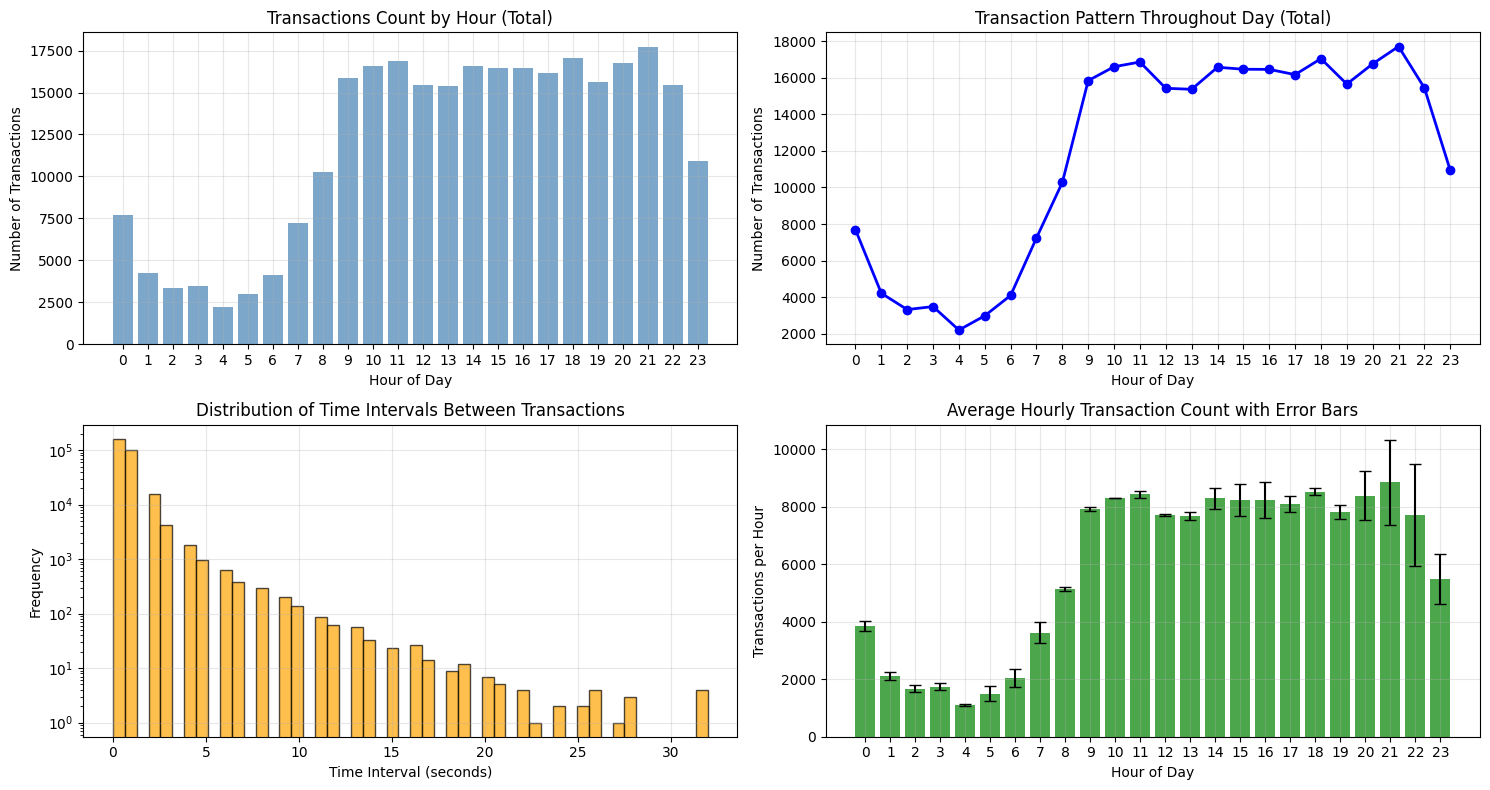


Hourly transaction statistics:
Min transactions in an hour: 2209
Max transactions in an hour: 17703
Peak hour: 21 (17703 transactions)
Quietest hour: 4 (2209 transactions)


In [20]:
# Calculate average time interval between transactions
time_diffs = crecard['Time'].diff().dropna()
avg_interval = time_diffs.mean()
median_interval = time_diffs.median()

print(f"Average interval between transactions: {avg_interval:.2f} seconds")
print(f"Median interval between transactions: {median_interval:.2f} seconds")
print(f"Average transactions per minute: {60/avg_interval:.2f}")
print(f"Average transactions per hour: {3600/avg_interval:.0f}")

# Calculate actual transactions per hour for each hour
hourly_counts = crecard.groupby('Hour').size()
avg_hourly = hourly_counts.mean()

print(f"\nActual average transactions per hour: {avg_hourly:.0f}")

# Plot hourly transaction distribution
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.bar(hourly_counts.index, hourly_counts.values, alpha=0.7, color='steelblue')
plt.title('Transactions Count by Hour (Total)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

plt.subplot(2, 2, 2)
plt.plot(hourly_counts.index, hourly_counts.values, 'b-o', linewidth=2, markersize=6)
plt.title('Transaction Pattern Throughout Day (Total)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

plt.subplot(2, 2, 3)
plt.hist(time_diffs, bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of Time Intervals Between Transactions')
plt.xlabel('Time Interval (seconds)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
# Calculate mean and std dev of hourly counts across the two days
hourly_stats_by_day = crecard.groupby(['Day', 'Hour']).size().unstack(level='Day', fill_value=0)
hourly_mean = hourly_stats_by_day.mean(axis=1)
hourly_std = hourly_stats_by_day.std(axis=1)

plt.bar(hourly_mean.index, hourly_mean.values, yerr=hourly_std, alpha=0.7, color='green', capsize=4)
plt.title('Average Hourly Transaction Count with Error Bars')
plt.xlabel('Hour of Day')
plt.ylabel('Transactions per Hour')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

# Additional statistics
print(f"\nHourly transaction statistics:")
print(f"Min transactions in an hour: {hourly_counts.min()}")
print(f"Max transactions in an hour: {hourly_counts.max()}")
print(f"Peak hour: {hourly_counts.idxmax()} ({hourly_counts.max()} transactions)")
print(f"Quietest hour: {hourly_counts.idxmin()} ({hourly_counts.min()} transactions)")

TIME INTERVAL ANALYSIS
Normal transactions:
  Mean interval: 0.61 seconds
  Median interval: 0.00 seconds
  Max interval: 32.00 seconds

Fraud transactions:
  Mean interval: 346.11 seconds
  Median interval: 126.00 seconds
  Max interval: 5489.00 seconds


C:\Users\ducho\AppData\Local\Temp\ipykernel_10060\2746228008.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([normal_intervals, fraud_intervals], labels=['Normal', 'Fraud'])


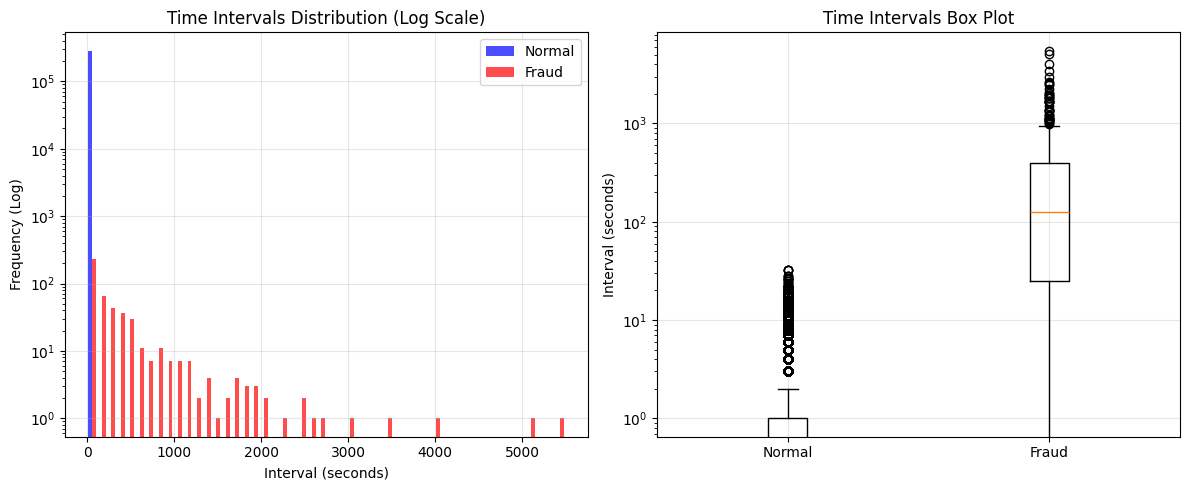

In [21]:
# Compare time intervals between normal and fraud transactions
normal_times = crecard[crecard['Class'] == 0]['Time'].sort_values()
fraud_times = crecard[crecard['Class'] == 1]['Time'].sort_values()

normal_intervals = normal_times.diff().dropna()
fraud_intervals = fraud_times.diff().dropna()

print("TIME INTERVAL ANALYSIS")
print(f"Normal transactions:")
print(f"  Mean interval: {normal_intervals.mean():.2f} seconds")
print(f"  Median interval: {normal_intervals.median():.2f} seconds")
print(f"  Max interval: {normal_intervals.max():.2f} seconds")

print(f"\nFraud transactions:")
print(f"  Mean interval: {fraud_intervals.mean():.2f} seconds")
print(f"  Median interval: {fraud_intervals.median():.2f} seconds")
print(f"  Max interval: {fraud_intervals.max():.2f} seconds")

# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist([normal_intervals, fraud_intervals], bins=50, alpha=0.7,
         color=['blue', 'red'], label=['Normal', 'Fraud'], log=True)
plt.title('Time Intervals Distribution (Log Scale)')
plt.xlabel('Interval (seconds)')
plt.ylabel('Frequency (Log)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot([normal_intervals, fraud_intervals], labels=['Normal', 'Fraud'])
plt.title('Time Intervals Box Plot')
plt.ylabel('Interval (seconds)')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
# Analyze fraud vs normal ratio and consecutive fraud intervals at 2 AM
hour_2_data = crecard[crecard['Hour'] == 2].copy()
hour_2_fraud = hour_2_data[hour_2_data['Class'] == 1]
hour_2_normal = hour_2_data[hour_2_data['Class'] == 0]

# Calculate fraud to normal ratio
fraud_count_2am = len(hour_2_fraud)
normal_count_2am = len(hour_2_normal)
fraud_to_normal_ratio = fraud_count_2am / normal_count_2am if normal_count_2am > 0 else 0

print(f"ANALYSIS FOR 2 AM TRANSACTIONS:")
print(f"Total transactions at 2 AM: {len(hour_2_data)}")
print(f"Fraud transactions: {fraud_count_2am}")
print(f"Normal transactions: {normal_count_2am}")
print(f"Fraud to Normal ratio: 1:{normal_count_2am/fraud_count_2am:.1f}" if fraud_count_2am > 0 else "No fraud transactions")
print(f"Fraud rate: {fraud_count_2am/len(hour_2_data)*100:.2f}%")

# Calculate consecutive fraud intervals
fraud_times_2am = hour_2_fraud['Time'].sort_values()
if len(fraud_times_2am) > 1:
    fraud_intervals_2am = fraud_times_2am.diff().dropna()
    avg_fraud_interval = fraud_intervals_2am.mean()
    median_fraud_interval = fraud_intervals_2am.median()

    print(f"\nCONSECUTIVE FRAUD INTERVALS AT 2 AM:")
    print(f"Average interval between fraud transactions: {avg_fraud_interval:.1f} seconds")
    print(f"Median interval between fraud transactions: {median_fraud_interval:.1f} seconds")
    print(f"Min interval: {fraud_intervals_2am.min():.1f} seconds")
    print(f"Max interval: {fraud_intervals_2am.max():.1f} seconds")

    # Show fraud transaction times at 2 AM
    print(f"\nFRAUD TRANSACTION TIMES AT 2 AM:")
    for i, time_val in enumerate(fraud_times_2am.values):
        print(f"Fraud {i+1}: {time_val:.0f}s")

else:
    print(f"\nInsufficient fraud transactions at 2 AM for interval analysis")

# Compare with overall dataset
overall_fraud_rate = crecard['Class'].mean() * 100
print(f"\nCOMPARISON:")
print(f"Overall fraud rate: {overall_fraud_rate:.3f}%")
print(f"2 AM fraud rate: {fraud_count_2am/len(hour_2_data)*100:.2f}%")
print(f"2 AM is {(fraud_count_2am/len(hour_2_data)*100)/overall_fraud_rate:.1f}x more likely for fraud")

ANALYSIS FOR 2 AM TRANSACTIONS:
Total transactions at 2 AM: 3328
Fraud transactions: 57
Normal transactions: 3271
Fraud to Normal ratio: 1:57.4
Fraud rate: 1.71%

CONSECUTIVE FRAUD INTERVALS AT 2 AM:
Average interval between fraud transactions: 1600.0 seconds
Median interval between fraud transactions: 19.0 seconds
Min interval: 0.0 seconds
Max interval: 84678.0 seconds

FRAUD TRANSACTION TIMES AT 2 AM:
Fraud 1: 7519s
Fraud 2: 7526s
Fraud 3: 7535s
Fraud 4: 7543s
Fraud 5: 7551s
Fraud 6: 7610s
Fraud 7: 7672s
Fraud 8: 7740s
Fraud 9: 7891s
Fraud 10: 8090s
Fraud 11: 8169s
Fraud 12: 8408s
Fraud 13: 8415s
Fraud 14: 8451s
Fraud 15: 8528s
Fraud 16: 8614s
Fraud 17: 8757s
Fraud 18: 8808s
Fraud 19: 8878s
Fraud 20: 8886s
Fraud 21: 9064s
Fraud 22: 93742s
Fraud 23: 93823s
Fraud 24: 93824s
Fraud 25: 93834s
Fraud 26: 93853s
Fraud 27: 93853s
Fraud 28: 93853s
Fraud 29: 93853s
Fraud 30: 93856s
Fraud 31: 93860s
Fraud 32: 93860s
Fraud 33: 93860s
Fraud 34: 93860s
Fraud 35: 93879s
Fraud 36: 93879s
Fraud 37: 9

- V1- V28

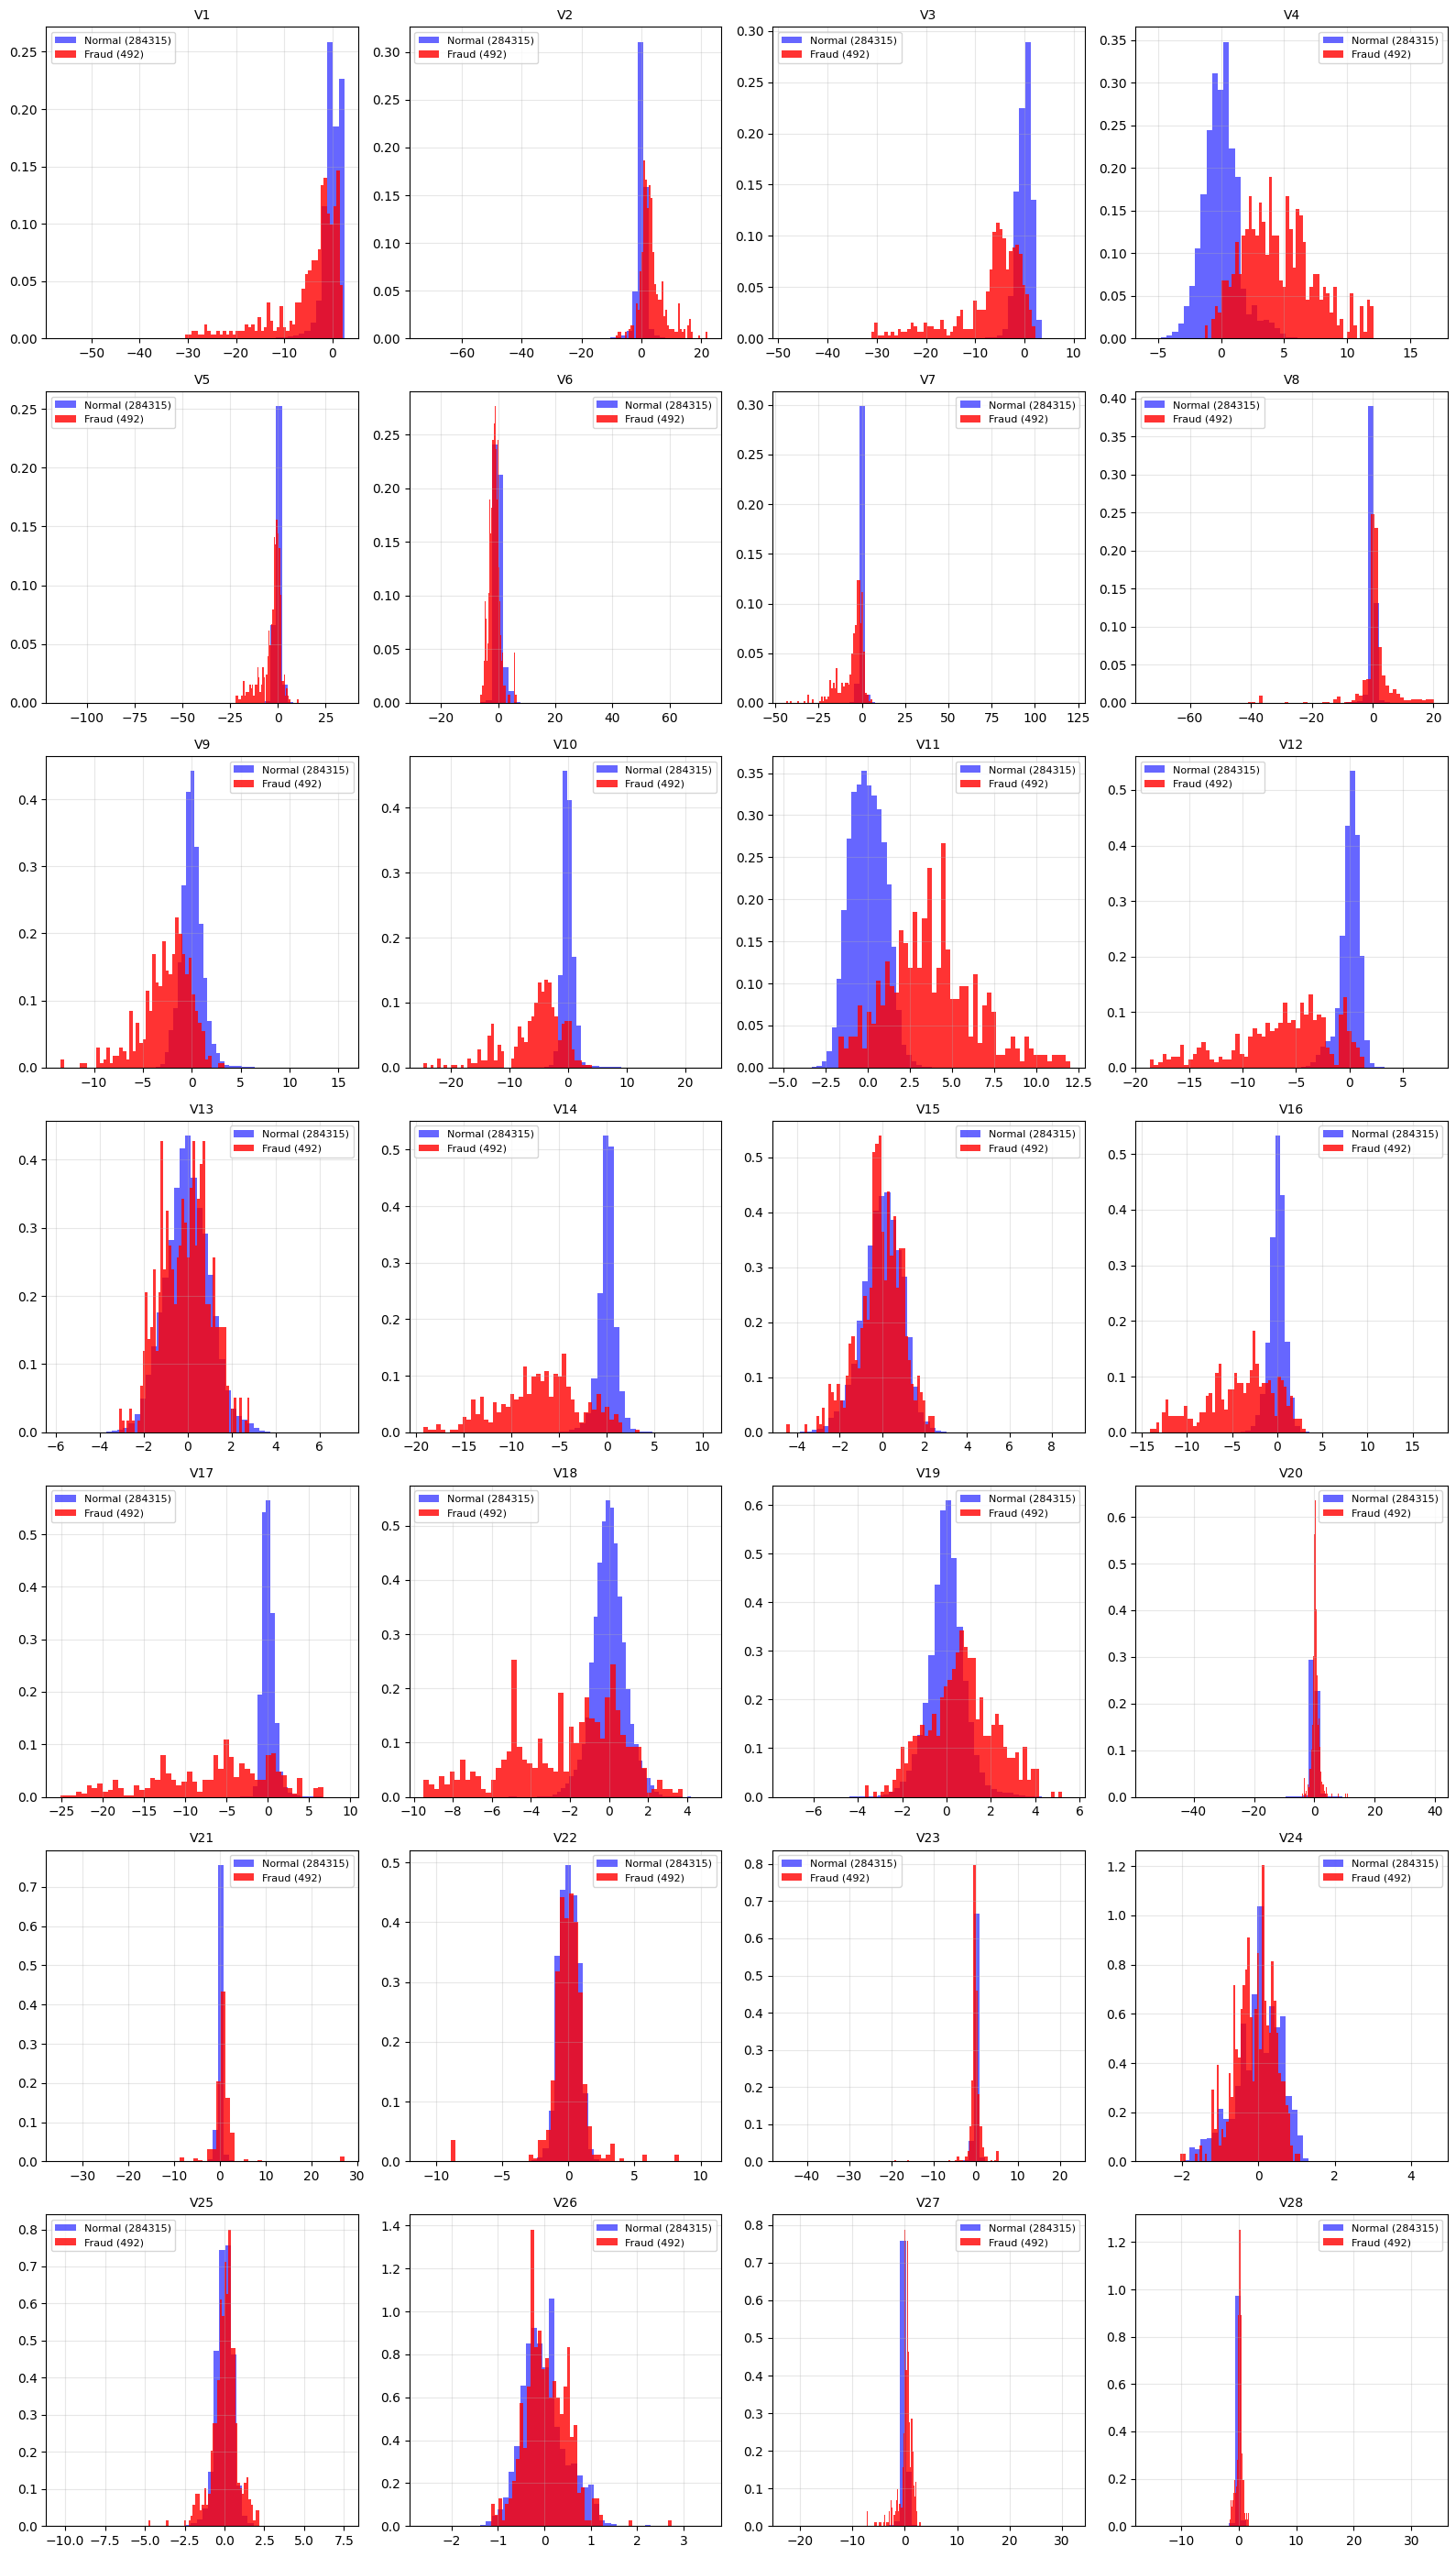

V FEATURES FRAUD vs NORMAL ANALYSIS (μ=Mean, σ=Std, S=Skewness, K=Kurtosis)
----------------------------------------------------------------------------------------------------
V1 : Normal(μ= 0.008, σ= 1.930, S=-3.130, K=31.065) vs Fraud(μ=-4.772, σ= 6.784, S=-1.792, K= 2.838)
V2 : Normal(μ=-0.006, σ= 1.636, S=-4.887, K=98.404) vs Fraud(μ= 3.624, σ= 4.291, S= 1.223, K= 2.559)
V3 : Normal(μ= 0.012, σ= 1.459, S=-1.454, K=14.545) vs Fraud(μ=-7.033, σ= 7.111, S=-1.510, K= 1.751)
V4 : Normal(μ=-0.008, σ= 1.399, S= 0.581, K= 2.096) vs Fraud(μ= 4.542, σ= 2.873, S= 0.495, K=-0.208)
V5 : Normal(μ= 0.005, σ= 1.357, S=-2.214, K=217.848) vs Fraud(μ=-3.151, σ= 5.372, S=-1.357, K= 1.699)
V6 : Normal(μ= 0.002, σ= 1.330, S= 1.843, K=42.987) vs Fraud(μ=-1.398, σ= 1.858, S= 0.865, K= 2.835)
V7 : Normal(μ= 0.010, σ= 1.179, S= 4.748, K=452.913) vs Fraud(μ=-5.569, σ= 7.207, S=-1.822, K= 4.190)
V8 : Normal(μ=-0.001, σ= 1.161, S=-8.395, K=209.769) vs Fraud(μ= 0.571, σ= 6.798, S=-2.821, K=16.583)
V9 : Normal(

In [23]:
import scipy.stats as stats

# Analyze V1-V28 distributions with fraud overlay
v_columns = [f'V{i}' for i in range(1, 29)]

fig, axes = plt.subplots(7, 4, figsize=(16, 28))
axes = axes.ravel()

for idx, col in enumerate(v_columns):
    normal_data = crecard[crecard['Class'] == 0][col]
    fraud_data = crecard[crecard['Class'] == 1][col]

    # Use density normalization to handle imbalanced classes
    axes[idx].hist(normal_data, bins=50, alpha=0.6, color='blue',
                   density=True, label=f'Normal ({len(normal_data)})')
    axes[idx].hist(fraud_data, bins=50, alpha=0.8, color='red',
                   density=True, label=f'Fraud ({len(fraud_data)})')

    axes[idx].set_title(f'{col}', fontsize=10)
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Enhanced statistical comparison with Skewness and Kurtosis
print("V FEATURES FRAUD vs NORMAL ANALYSIS (μ=Mean, σ=Std, S=Skewness, K=Kurtosis)")
print("-" * 100)

for col in v_columns:
    normal_stats = crecard[crecard['Class'] == 0][col]
    fraud_stats = crecard[crecard['Class'] == 1][col]

    # Calculate skewness and kurtosis
    normal_skew = stats.skew(normal_stats)
    fraud_skew = stats.skew(fraud_stats)
    normal_kurt = stats.kurtosis(normal_stats)
    fraud_kurt = stats.kurtosis(fraud_stats)

    print(f"{col:3}: Normal(μ={normal_stats.mean():6.3f}, σ={normal_stats.std():6.3f}, "
          f"S={normal_skew:6.3f}, K={normal_kurt:6.3f}) vs "
          f"Fraud(μ={fraud_stats.mean():6.3f}, σ={fraud_stats.std():6.3f}, "
          f"S={fraud_skew:6.3f}, K={fraud_kurt:6.3f})")

# Summary of extreme skewness/kurtosis differences
print("\nFEATURES WITH SIGNIFICANT DISTRIBUTION DIFFERENCES:")
print("-" * 60)

skew_diff_threshold = 1.0
kurt_diff_threshold = 2.0

for col in v_columns:
    normal_stats = crecard[crecard['Class'] == 0][col]
    fraud_stats = crecard[crecard['Class'] == 1][col]

    skew_diff = abs(stats.skew(normal_stats) - stats.skew(fraud_stats))
    kurt_diff = abs(stats.kurtosis(normal_stats) - stats.kurtosis(fraud_stats))

    if skew_diff > skew_diff_threshold or kurt_diff > kurt_diff_threshold:
        print(f"{col}: Skew_diff={skew_diff:.3f}, Kurt_diff={kurt_diff:.3f}")

In [24]:
from scipy.stats import ttest_ind

features_to_test = ['V17', 'V14', 'V12', 'V10', 'V4', 'V11', 'V16', 'V3', 'V9', 'V18', 'V2']

print("WELCH'S T-TEST RESULTS")
print("-" * 50)

for feature in features_to_test:
    normal_vals = crecard[crecard['Class'] == 0][feature]
    fraud_vals = crecard[crecard['Class'] == 1][feature]

    t_stat, p_val = ttest_ind(fraud_vals, normal_vals, equal_var=False)

    print(f"{feature}: t={t_stat:8.3f}, p={p_val:.2e}")

WELCH'S T-TEST RESULTS
--------------------------------------------------
V17: t= -21.248, p=1.56e-71
V14: t= -36.201, p=1.04e-140
V12: t= -29.880, p=1.48e-112
V10: t= -25.755, p=3.38e-93
V4: t=  35.116, p=4.59e-136
V11: t=  31.519, p=4.58e-120
V16: t= -23.799, p=7.91e-84
V3: t= -21.976, p=4.79e-75
V9: t= -22.928, p=1.19e-79
V18: t= -17.214, p=2.64e-52
V2: t=  18.761, p=1.29e-59


In [25]:
# Welch's t-test for additional V features
additional_features = ['V1', 'V5', 'V7', 'V8', 'V20']

for feature in additional_features:
    normal_vals = crecard[crecard['Class'] == 0][feature]
    fraud_vals = crecard[crecard['Class'] == 1][feature]

    t_stat, p_val = ttest_ind(fraud_vals, normal_vals, equal_var=False)

    print(f"{feature}: t={t_stat:8.3f}, p={p_val:.2e}")

V1: t= -15.629, p=5.49e-45
V5: t= -13.032, p=1.50e-33
V7: t= -17.169, p=4.29e-52
V8: t=   1.865, p=6.28e-02
V20: t=   6.142, p=1.69e-09


In [26]:
for feature in ['V28', 'V21', 'V23', 'V27']:
    normal_vals = crecard[crecard['Class'] == 0][feature]
    fraud_vals = crecard[crecard['Class'] == 1][feature]

    t_stat, p_val = ttest_ind(fraud_vals, normal_vals, equal_var=False)

    print(f"{feature}: t={t_stat:8.3f}, p={p_val:.2e}")

V28: t=   3.071, p=2.25e-03
V21: t=   4.098, p=4.88e-05
V23: t=  -0.567, p=5.71e-01
V27: t=   2.753, p=6.13e-03


In [27]:
for feature in ['V13', 'V15', 'V24', 'V26', 'V22', 'V19', 'V25']:
    normal_vals = crecard[crecard['Class'] == 0][feature]
    fraud_vals = crecard[crecard['Class'] == 1][feature]

    t_stat, p_val = ttest_ind(fraud_vals, normal_vals, equal_var=False)

    print(f"{feature}: t={t_stat:8.3f}, p={p_val:.2e}")

V13: t=  -2.198, p=2.84e-02
V15: t=  -1.965, p=4.99e-02
V24: t=  -4.525, p=7.57e-06
V26: t=   2.431, p=1.54e-02
V22: t=   0.209, p=8.35e-01
V19: t=   9.819, p=6.71e-21
V25: t=   1.155, p=2.49e-01


In [28]:
from scipy.stats import levene, bartlett, ks_2samp

print("VARIANCE AND DISTRIBUTION TESTS")
print("=" * 80)

# Test all V features + Amount and Time
test_features = v_columns + ['Amount', 'Time']

print(f"{'Feature':<8} {'Levene_stat':<12} {'Levene_p':<12} {'Bartlett_stat':<13} {'Bartlett_p':<12} {'KS_stat':<10} {'KS_p':<12}")
print("-" * 80)

for feature in test_features:
    normal_vals = crecard[crecard['Class'] == 0][feature]
    fraud_vals = crecard[crecard['Class'] == 1][feature]

    # Levene test (robust to non-normality)
    levene_stat, levene_p = levene(normal_vals, fraud_vals)

    # Bartlett test (assumes normality)
    bartlett_stat, bartlett_p = bartlett(normal_vals, fraud_vals)

    # Kolmogorov-Smirnov test
    ks_stat, ks_p = ks_2samp(normal_vals, fraud_vals)

    print(f"{feature:<8} {levene_stat:<12.3f} {levene_p:<12.2e} {bartlett_stat:<13.3f} {bartlett_p:<12.2e} {ks_stat:<10.3f} {ks_p:<12.2e}")

print("\nSIGNIFICANT DIFFERENCES (p < 0.001):")
print("-" * 40)

significant_features = []
for feature in test_features:
    normal_vals = crecard[crecard['Class'] == 0][feature]
    fraud_vals = crecard[crecard['Class'] == 1][feature]

    _, levene_p = levene(normal_vals, fraud_vals)
    _, ks_p = ks_2samp(normal_vals, fraud_vals)

    if levene_p < 0.001 and ks_p < 0.001:
        significant_features.append(feature)

print(f"Features with significant variance & distribution differences: {len(significant_features)}")
print(f"List: {significant_features}")

VARIANCE AND DISTRIBUTION TESTS
Feature  Levene_stat  Levene_p     Bartlett_stat Bartlett_p   KS_stat    KS_p        
--------------------------------------------------------------------------------
V1       2524.139     0.00e+00     4284.851      0.00e+00     0.475      2.05e-102   
V2       1046.310     4.03e-229    1923.815      0.00e+00     0.633      2.16e-191   
V3       6975.830     0.00e+00     9390.759      0.00e+00     0.704      9.93e-245   
V4       930.799      4.23e-204    867.700       1.03e-190    0.766      2.04e-302   
V5       3496.810     0.00e+00     5760.794      0.00e+00     0.436      1.35e-85    
V6       106.524      5.72e-25     138.572       5.46e-32     0.486      1.52e-107   
V7       9023.621     0.00e+00     15534.460     0.00e+00     0.661      6.78e-211   
V8       2918.447     0.00e+00     14137.573     0.00e+00     0.368      2.84e-60    
V9       1099.887     1.01e-240    1272.105      1.30e-278    0.576      4.39e-155   
V10      6180.392     0.00e

- Try scatterplots with some representative variables.

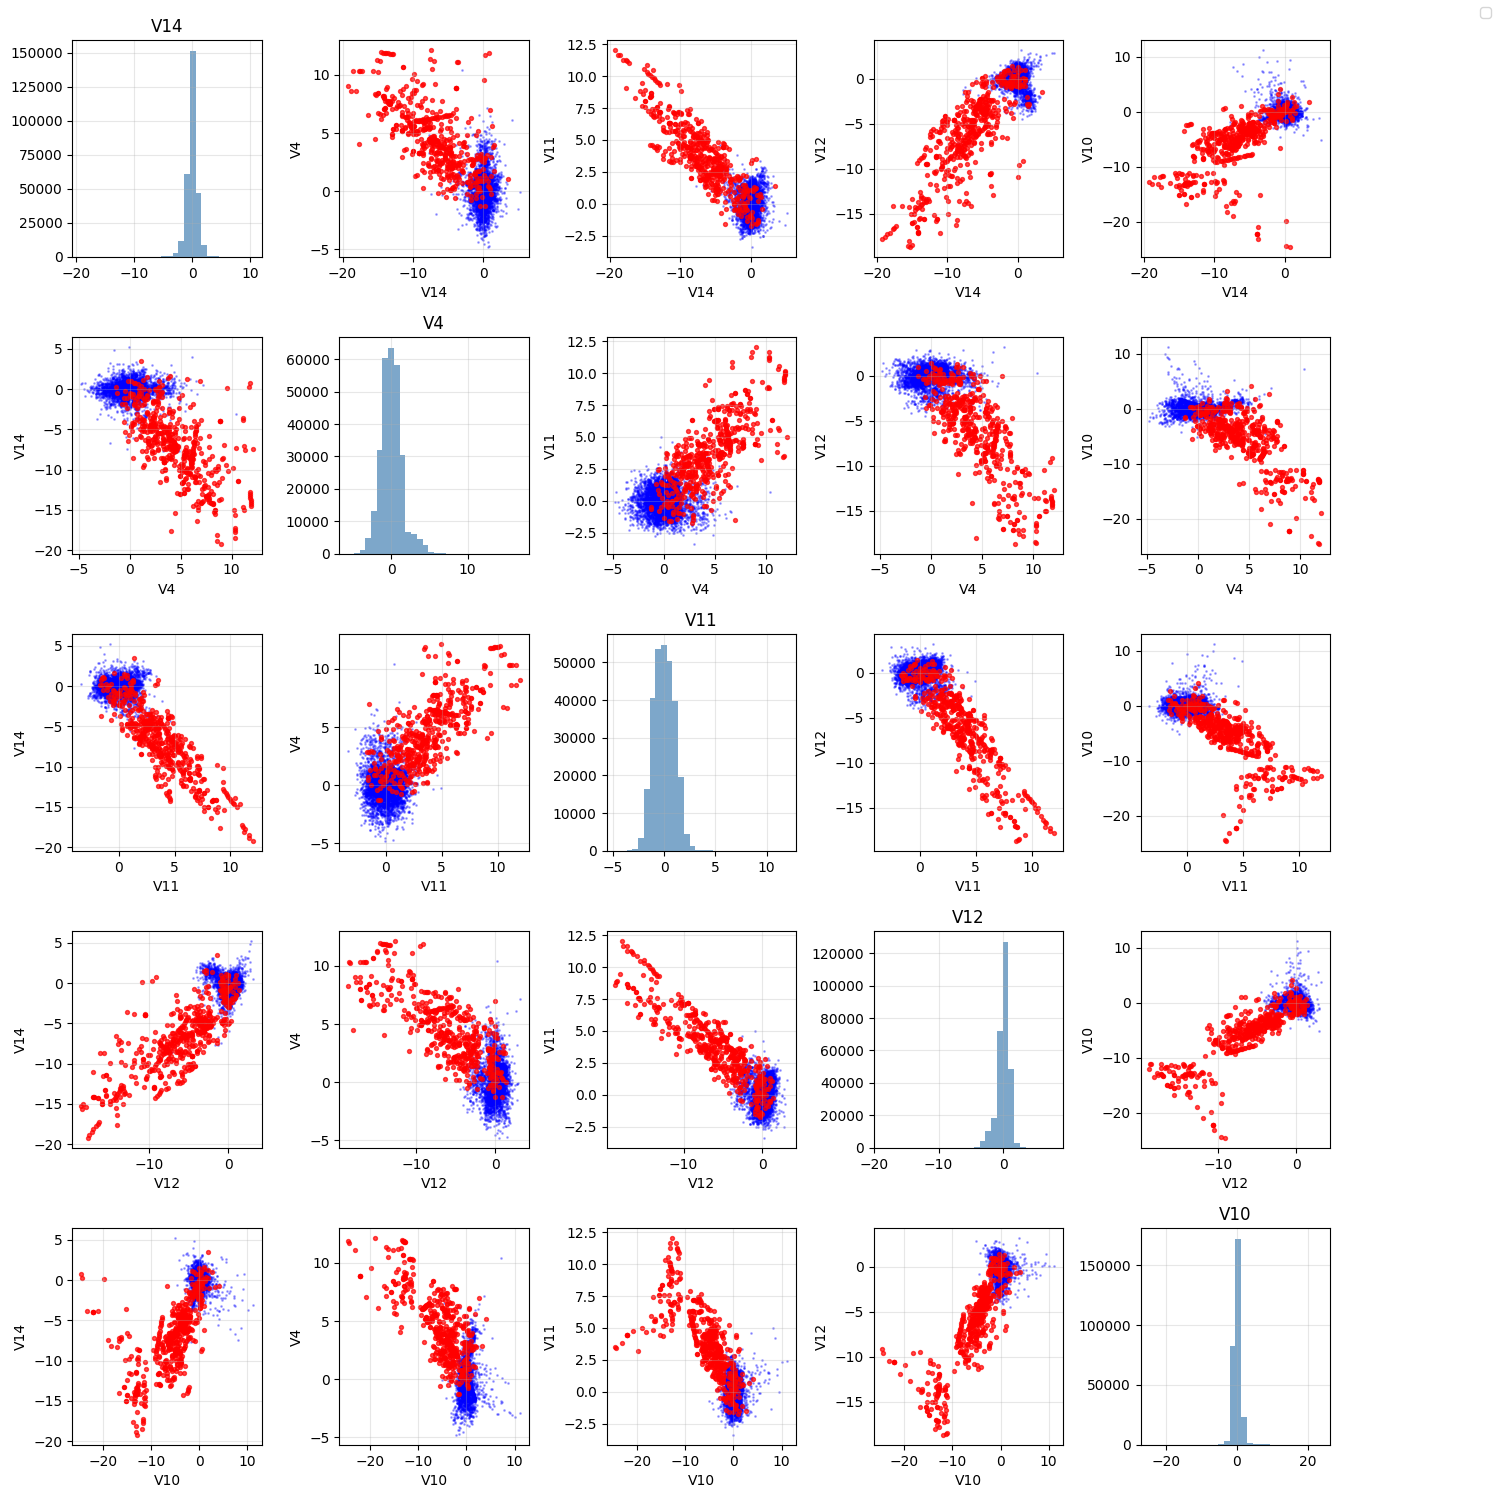

In [29]:
normal_df = crecard[crecard['Class'] == 0]
fraud_df = crecard[crecard['Class'] == 1]
normal_sample = normal_df.sample(n=5000, random_state=42)

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
v_features = ['V14', 'V4', 'V11', 'V12', 'V10']

for i, var1 in enumerate(v_features):
    for j, var2 in enumerate(v_features):
        ax = axes[i, j]
        if i == j:
            ax.hist(crecard[var1], bins=30, alpha=0.7, color='steelblue')
            ax.set_title(f'{var1}')
        else:
            ax.scatter(normal_sample[var1], normal_sample[var2], alpha=0.3, s=1, color='blue', label='Normal (Sample)')
            ax.scatter(fraud_df[var1], fraud_df[var2], alpha=0.7, s=8, color='red', label='Fraud')
            ax.set_xlabel(var1)
            ax.set_ylabel(var2)
        ax.grid(True, alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

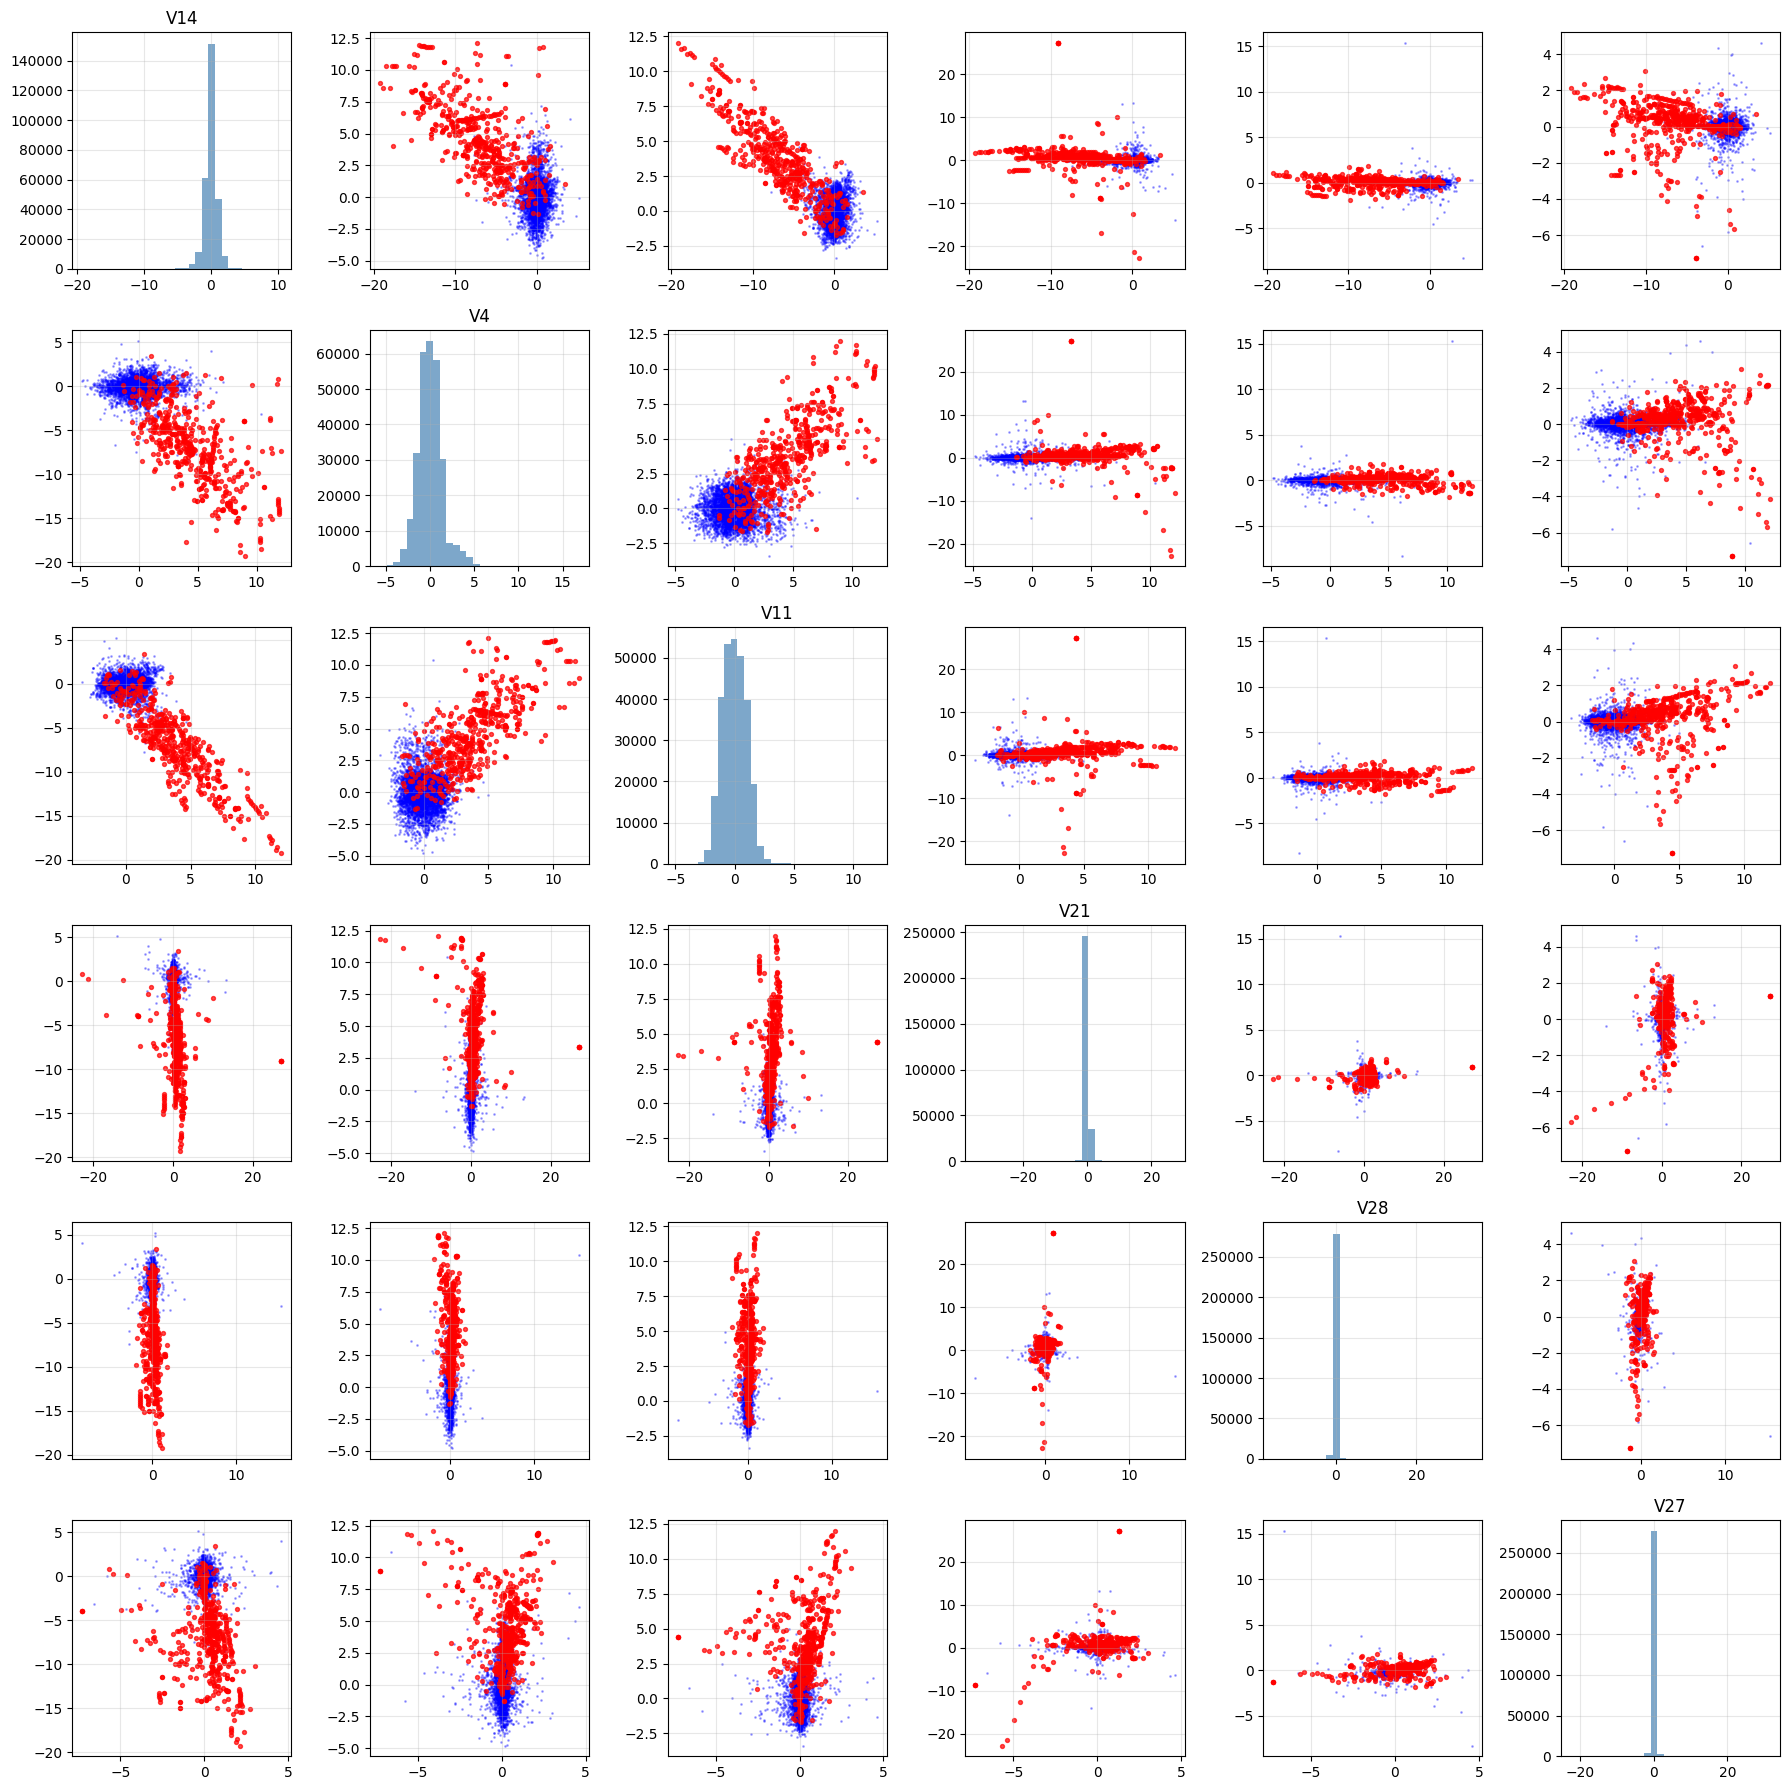

In [30]:
v_features = ['V14', 'V4', 'V11', 'V21', 'V28', 'V27']

fig, axes = plt.subplots(6, 6, figsize=(18, 18))
for i, var1 in enumerate(v_features):
    for j, var2 in enumerate(v_features):
        ax = axes[i, j]
        if i == j:
            ax.hist(crecard[var1], bins=30, alpha=0.7, color='steelblue')
            ax.set_title(f'{var1}')
        else:
            ax.scatter(normal_sample[var1], normal_sample[var2], alpha=0.3, s=1, color='blue')
            ax.scatter(fraud_df[var1], fraud_df[var2], alpha=0.7, s=8, color='red')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- Compare first 24 hours vs last 24 hours

In [31]:
crecard.head(5)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V24       V25       V26       V27       V28  \
0  0.098698  0.363787  ...  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1  0.085102 -0.255425  ... -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.247676 -1.514654  ... -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.377436 -1.387024  ... -1.175575  0.647376 -0.221929  0.062723  0.061458   
4 -0.270533  0.817739  ...  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  Amount_bin  Hour  Day  
0  149.62      0           0     0    0  
1    2.69      0           0     0    0  
2  378.66      0           0     0    0  
3  123.50      0           0     0    0  
4   69.99      0           0     0    0  

[5 rows x 34 columns]

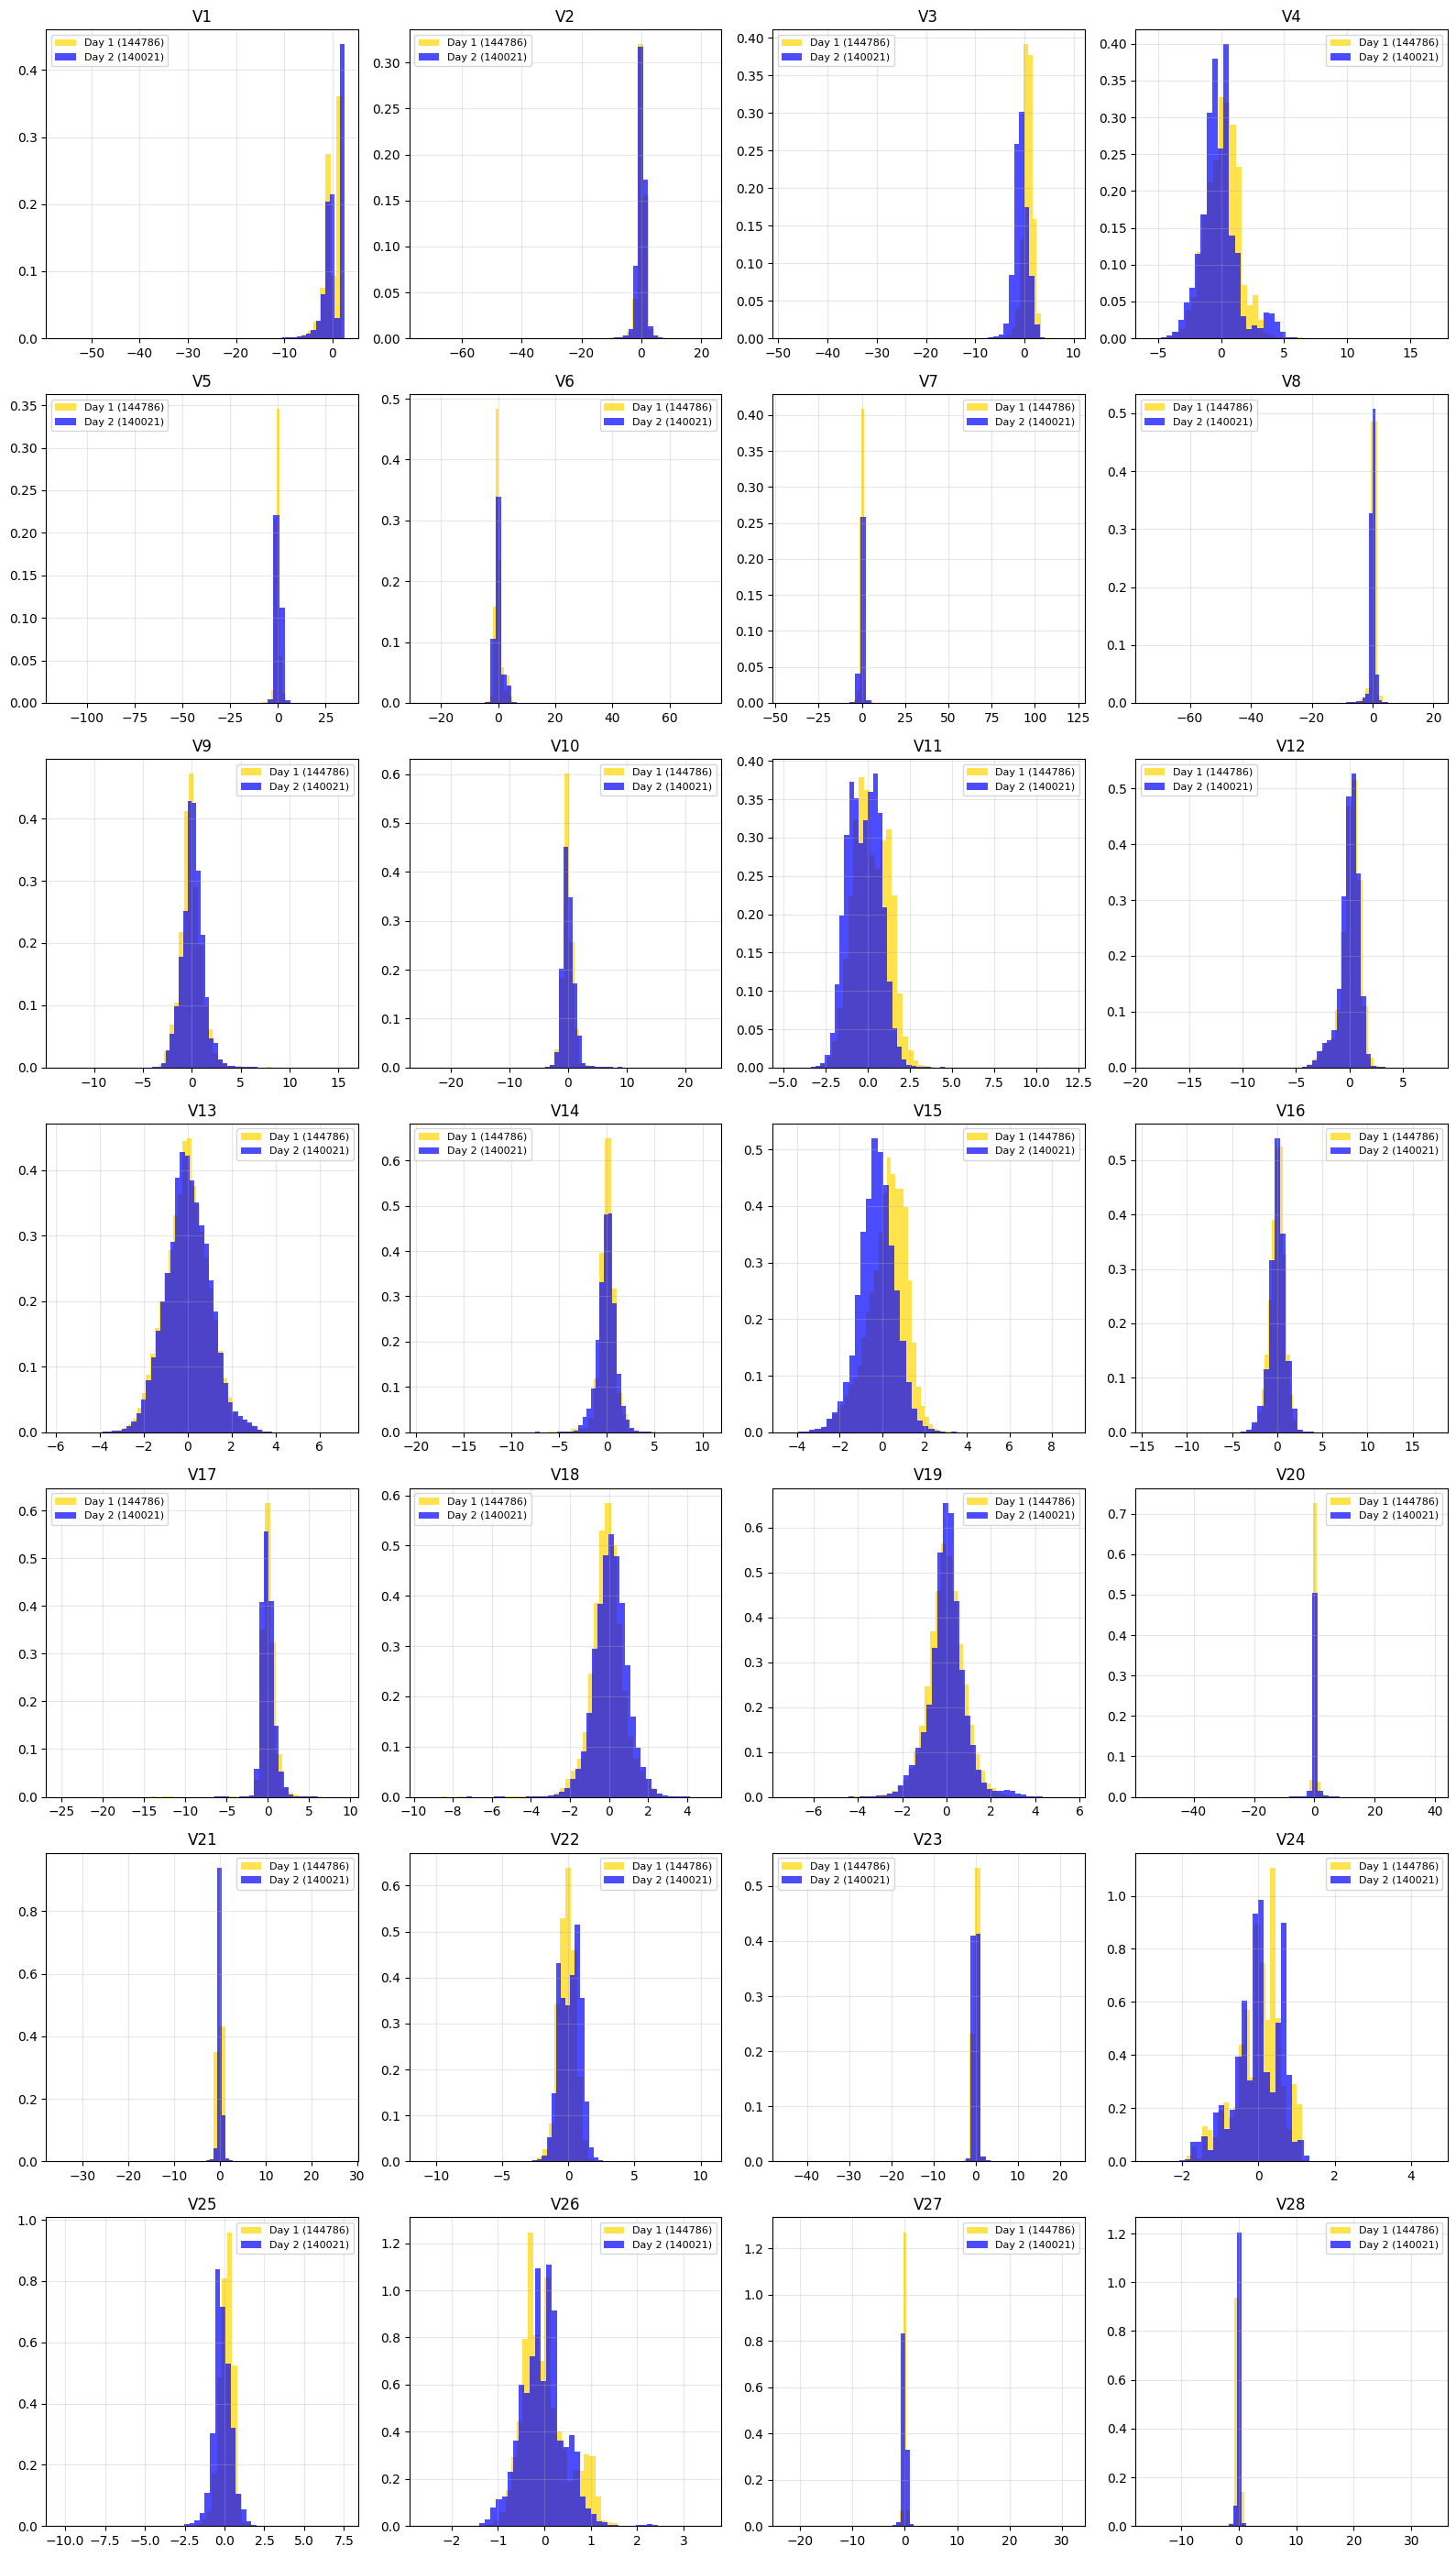

Day 1 transactions: 144,786
Day 2 transactions: 140,021
Day 1 frauds: 281
Day 2 frauds: 211

VARIANCE AND DISTRIBUTION TESTS (DAY 1 vs DAY 2)
Feature  Levene_stat  Levene_p     Bartlett_stat Bartlett_p   KS_stat    KS_p        
--------------------------------------------------------------------------------
V1       2483.798     0.00e+00     2306.274      0.00e+00     0.423      0.00e+00    
V2       102.159      5.17e-24     303.297       6.30e-68     0.043      3.37e-112   
V3       4762.017     0.00e+00     2245.772      0.00e+00     0.519      0.00e+00    
V4       121.264      3.39e-28     2090.829      0.00e+00     0.173      0.00e+00    
V5       352.164      1.60e-78     599.535       2.11e-132    0.268      0.00e+00    
V6       220.736      6.52e-50     661.096       8.63e-146    0.115      0.00e+00    
V7       801.257      5.06e-176    1572.000      0.00e+00     0.138      0.00e+00    
V8       14.982       1.09e-04     799.637       6.47e-176    0.164      0.00e+00    
V9 

In [32]:
from scipy.stats import levene, bartlett, ks_2samp

# Compare V1-V28 distributions between Day 1 and Day 2
day1_data = crecard[crecard['Time'] < 86400]
day2_data = crecard[crecard['Time'] >= 86400]

v_columns = [f'V{i}' for i in range(1, 29)]
fig, axes = plt.subplots(7, 4, figsize=(16, 28))
axes = axes.ravel()

for idx, col in enumerate(v_columns):
    axes[idx].hist(day1_data[col], bins=50, alpha=0.7, color='gold',
                   density=True, label=f'Day 1 ({len(day1_data)})')
    axes[idx].hist(day2_data[col], bins=50, alpha=0.7, color='blue',
                   density=True, label=f'Day 2 ({len(day2_data)})')
    axes[idx].set_title(f'{col}')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Day 1 transactions: {len(day1_data):,}")
print(f"Day 2 transactions: {len(day2_data):,}")
print(f"Day 1 frauds: {day1_data['Class'].sum()}")
print(f"Day 2 frauds: {day2_data['Class'].sum()}")

# Variance and distribution tests for Day 1 vs Day 2
print("\nVARIANCE AND DISTRIBUTION TESTS (DAY 1 vs DAY 2)")
print("=" * 80)
print(f"{'Feature':<8} {'Levene_stat':<12} {'Levene_p':<12} {'Bartlett_stat':<13} {'Bartlett_p':<12} {'KS_stat':<10} {'KS_p':<12}")
print("-" * 80)

for feature in v_columns:
    day1_vals = day1_data[feature]
    day2_vals = day2_data[feature]

    levene_stat, levene_p = levene(day1_vals, day2_vals)
    bartlett_stat, bartlett_p = bartlett(day1_vals, day2_vals)
    ks_stat, ks_p = ks_2samp(day1_vals, day2_vals)

    print(f"{feature:<8} {levene_stat:<12.3f} {levene_p:<12.2e} {bartlett_stat:<13.3f} {bartlett_p:<12.2e} {ks_stat:<10.3f} {ks_p:<12.2e}")

print(f"\nSIGNIFICANT DIFFERENCES (p < 0.001): {len([f for f in v_columns if ks_2samp(day1_data[f], day2_data[f])[1] < 0.001])}/{len(v_columns)} features")

- Create a correlation table.

CORRELATION MATRIX (showing correlations > 0.3 or < -0.3)
Feature 1    Feature 2    Correlation 
----------------------------------------
Time         Day                0.896
Amount       Amount_bin         0.809
V2           Amount            -0.531
V3           Day               -0.451
Time         V3                -0.420
Time         Hour               0.416
V7           Amount             0.397
V5           Amount            -0.386
V7           Amount_bin         0.374
V2           Amount_bin        -0.361
V12          Hour               0.352
V20          Amount             0.339
V17          Class             -0.326
V5           Amount_bin        -0.304
V14          Class             -0.303


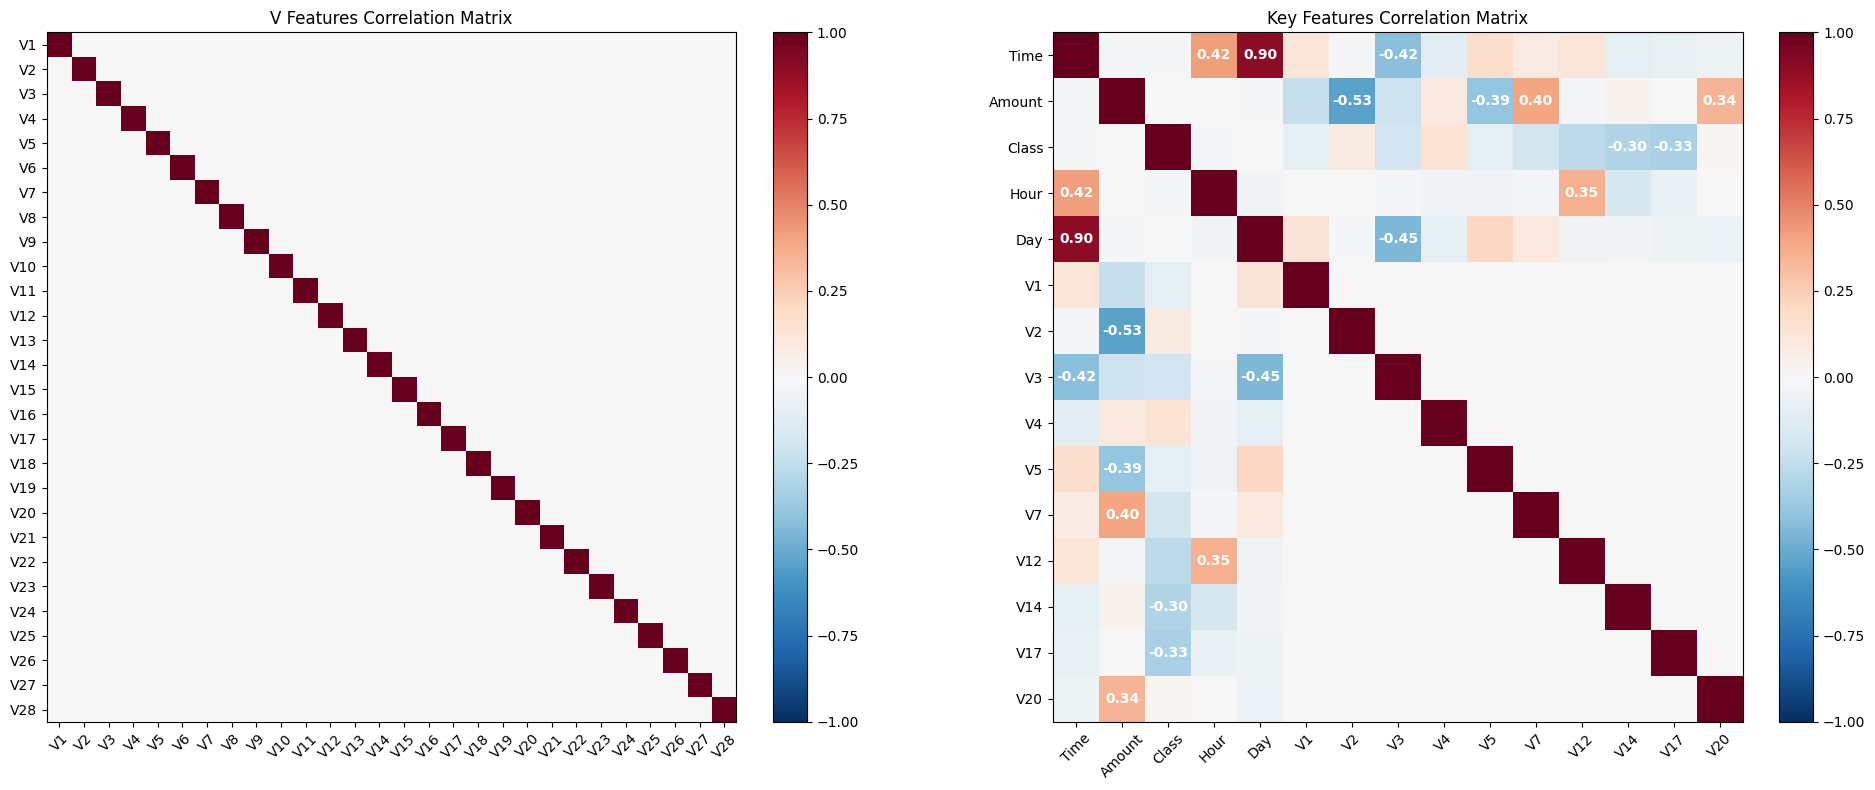


CORRELATION WITH FRAUD CLASS:
----------------------------------------
V17         :  -0.3265
V14         :  -0.3025
V12         :  -0.2606
V10         :  -0.2169
V16         :  -0.1965
V3          :  -0.1930
V7          :  -0.1873
V11         :   0.1549
V4          :   0.1334
V18         :  -0.1115
V1          :  -0.1013
V9          :  -0.0977
V5          :  -0.0950
V2          :   0.0913
V6          :  -0.0436
V21         :   0.0404
V19         :   0.0348
V20         :   0.0201
V8          :   0.0199
V27         :   0.0176
Hour        :  -0.0171
Time        :  -0.0123


In [33]:
# Calculate correlation matrix for all features
corr_matrix = crecard.corr()

# Display correlation matrix with formatting
print("CORRELATION MATRIX (showing correlations > 0.3 or < -0.3)")
print("=" * 80)

# Find strong correlations (>0.3 or <-0.3, excluding self-correlations)
strong_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) >= 0.3:
            strong_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

# Sort by absolute correlation value
strong_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print(f"{'Feature 1':<12} {'Feature 2':<12} {'Correlation':<12}")
print("-" * 40)
for feat1, feat2, corr_val in strong_corr_pairs:
    print(f"{feat1:<12} {feat2:<12} {corr_val:>11.3f}")

# Visualize correlation heatmap for V features + Amount, Time, Class
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap 1: All V features
v_corr = crecard[v_columns].corr()
im1 = axes[0].imshow(v_corr, cmap='RdBu_r', vmin=-1, vmax=1)
axes[0].set_xticks(range(len(v_columns)))
axes[0].set_yticks(range(len(v_columns)))
axes[0].set_xticklabels(v_columns, rotation=45)
axes[0].set_yticklabels(v_columns)
axes[0].set_title('V Features Correlation Matrix')

# Add correlation values to heatmap
for i in range(len(v_columns)):
    for j in range(len(v_columns)):
        if abs(v_corr.iloc[i, j]) >= 0.3 and i != j:
            axes[0].text(j, i, f'{v_corr.iloc[i, j]:.2f}',
                        ha='center', va='center', color='white', fontweight='bold')

# Heatmap 2: Key features including non-PCA features
key_features = ['Time', 'Amount', 'Class', 'Hour', 'Day'] + [f'V{i}' for i in [1, 2, 3, 4, 5, 7, 12, 14, 17, 20]]
key_corr = crecard[key_features].corr()
im2 = axes[1].imshow(key_corr, cmap='RdBu_r', vmin=-1, vmax=1)
axes[1].set_xticks(range(len(key_features)))
axes[1].set_yticks(range(len(key_features)))
axes[1].set_xticklabels(key_features, rotation=45)
axes[1].set_yticklabels(key_features)
axes[1].set_title('Key Features Correlation Matrix')

# Add correlation values
for i in range(len(key_features)):
    for j in range(len(key_features)):
        if abs(key_corr.iloc[i, j]) >= 0.3 and i != j:
            axes[1].text(j, i, f'{key_corr.iloc[i, j]:.2f}',
                        ha='center', va='center', color='white', fontweight='bold')

# Add colorbars
plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# Class correlation analysis
print(f"\nCORRELATION WITH FRAUD CLASS:")
print("-" * 40)
class_corrs = corr_matrix['Class'].abs().sort_values(ascending=False)
for feature in class_corrs.index:
    if feature != 'Class' and abs(class_corrs[feature]) > 0.01:
        print(f"{feature:<12}: {corr_matrix['Class'][feature]:>8.4f}")

- Reduce the dimensionality to 2, then check if it follows any pattern or rule.

In [1]:
# image running on gpu.png to avoid re-running (as the umap process is time-consuming)

# import numpy as np
# import matplotlib.pyplot as plt
# try:
#     import cupy as cp
#     import cudf
#     from cuml.manifold import UMAP as cuUMAP
#     from cuml.preprocessing import StandardScaler as cuStandardScaler
#     GPU_AVAILABLE = True
#     print("GPU libraries loaded successfully")
# except ImportError:
#     from sklearn.manifold import UMAP
#     from sklearn.preprocessing import StandardScaler
#     GPU_AVAILABLE = False
#     print("Using CPU fallback - install cupy and cuml for GPU acceleration")

# # Prepare data
# v_columns = [col for col in crecard.columns if col.startswith('V')]
# X = crecard[v_columns].values
# y = crecard['Class'].values

# if GPU_AVAILABLE:
#     # GPU-optimized processing
#     print("Using GPU acceleration...")

#     # Convert to GPU arrays
#     X_gpu = cp.asarray(X, dtype=cp.float32)
#     y_gpu = cp.asarray(y)

#     # GPU scaling
#     scaler = cuStandardScaler()
#     X_scaled_gpu = scaler.fit_transform(X_gpu)

#     # GPU UMAP (faster than t-SNE)
#     reducer = cuUMAP(
#         n_components=2,
#         n_neighbors=15,  # Optimized for large datasets
#         min_dist=0.1,
#         metric='euclidean',
#         random_state=42,
#         verbose=True
#     )

#     X_embedded_gpu = reducer.fit_transform(X_scaled_gpu)

#     # Convert back to CPU for visualization
#     X_embedded = cp.asnumpy(X_embedded_gpu)
#     y_cpu = cp.asnumpy(y_gpu)

#     print("GPU processing completed")

# else:
#     # CPU fallback
#     print("Using CPU fallback...")
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)

#     reducer = UMAP(
#         n_components=2,
#         n_neighbors=15,
#         min_dist=0.1,
#         metric='euclidean',
#         random_state=42,
#         n_jobs=-1
#     )

#     X_embedded = reducer.fit_transform(X_scaled)
#     y_cpu = y

# # Optimized visualization
# plt.figure(figsize=(14, 10))
# normal_mask = (y_cpu == 0)
# fraud_mask = (y_cpu == 1)

# # Subsample normal points for better visualization
# normal_indices = np.where(normal_mask)[0]
# if len(normal_indices) > 10000:
#     normal_sample_idx = np.random.choice(normal_indices, 10000, replace=False)
#     normal_sample_mask = np.zeros_like(normal_mask, dtype=bool)
#     normal_sample_mask[normal_sample_idx] = True
# else:
#     normal_sample_mask = normal_mask

# # Plot subsampled normal points
# plt.scatter(X_embedded[normal_sample_mask, 0], X_embedded[normal_sample_mask, 1],
#            c='steelblue', alpha=0.3, s=0.5, label=f'Normal (sample: {normal_sample_mask.sum()})')

# # Plot all fraud points
# plt.scatter(X_embedded[fraud_mask, 0], X_embedded[fraud_mask, 1],
#            c='red', alpha=0.8, s=15, label=f'Fraud ({fraud_mask.sum()})', edgecolors='darkred', linewidth=0.2)

# plt.title('UMAP Visualization of Credit Card Transactions\n(GPU Accelerated)' if GPU_AVAILABLE else 'UMAP Visualization of Credit Card Transactions\n(CPU)')
# plt.xlabel('UMAP Component 1')
# plt.ylabel('UMAP Component 2')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

# # Enhanced analysis
# fraud_coords = X_embedded[fraud_mask]
# normal_coords = X_embedded[normal_mask]

# print(f"\nEmbedding Analysis:")
# print(f"Total points: {len(X_embedded):,}")
# print(f"Normal transactions: {normal_mask.sum():,}")
# print(f"Fraud transactions: {fraud_mask.sum():,}")

# print(f"\nFraud cluster analysis:")
# print(f"X-range: [{fraud_coords[:, 0].min():.2f}, {fraud_coords[:, 0].max():.2f}]")
# print(f"Y-range: [{fraud_coords[:, 1].min():.2f}, {fraud_coords[:, 1].max():.2f}]")
# print(f"Fraud centroid: ({fraud_coords[:, 0].mean():.2f}, {fraud_coords[:, 1].mean():.2f})")
# print(f"Fraud std dev: {fraud_coords[:, 0].std():.2f} (X), {fraud_coords[:, 1].std():.2f} (Y)")

# print(f"\nNormal cluster analysis:")
# print(f"X-range: [{normal_coords[:, 0].min():.2f}, {normal_coords[:, 0].max():.2f}]")
# print(f"Y-range: [{normal_coords[:, 1].min():.2f}, {normal_coords[:, 1].max():.2f}]")
# print(f"Normal centroid: ({normal_coords[:, 0].mean():.2f}, {normal_coords[:, 1].mean():.2f})")
# print(f"Normal std dev: {normal_coords[:, 0].std():.2f} (X), {normal_coords[:, 1].std():.2f} (Y)")

# # Cluster separation analysis
# from scipy.spatial.distance import cdist
# fraud_center = fraud_coords.mean(axis=0)
# normal_center = normal_coords.mean(axis=0)
# center_distance = np.linalg.norm(fraud_center - normal_center)

# print(f"\nCluster separation:")
# print(f"Distance between centroids: {center_distance:.2f}")
# print(f"Fraud cluster compactness: {fraud_coords.std():.2f}")
# print(f"Normal cluster compactness: {normal_coords.std():.2f}")

# # Memory cleanup for GPU
# if GPU_AVAILABLE:
#     del X_gpu, X_scaled_gpu, X_embedded_gpu, y_gpu
#     cp.get_default_memory_pool().free_all_blocks()
#     print("\nGPU memory cleared")

### Conclusion
#### **I. Key Insights and Findings**

1.  **Data Characteristics & Severe Imbalance:**
    *   **Imbalance:** The dataset is extremely imbalanced, with only **0.172%** of transactions being fraudulent (492 out of 284,807). This necessitates special handling methods and the use of appropriate metrics like AUPRC instead of Accuracy.
    *   **Clean Data:** There are no missing values, allowing for immediate focus on analysis.

2.  **Analysis of PCA Variables (V1-V28):**
    *   **Distinct Distributions:** The V variables have very different distributions between normal and fraudulent transactions. Variables such as **V17, V14, V12, V10, V4, V11, V3, and V9** show the most significant differences, indicating they contain strong signals for classification.
    *   **Fraud and Outliers:** Fraudulent transactions tend to be outliers in many of the V variables. The average fraud rate among outliers is **1.81%**, more than **10 times higher** than the overall rate (0.172%). This suggests that fraudulent activities often deviate from normal transaction behavior.

3.  **Analysis of the 'Amount' Variable:**
    *   **Mean-Median Paradox:** This is one of the most unique findings. Fraudulent transactions have a **higher Mean** ($122.21 vs. $88.29) but a **much lower Median** ($9.25 vs. $22.00). This indicates that fraud often involves many small transactions, but also includes some transactions with extremely large values.
    *   **Zero-Value Transactions:** There are 27 fraudulent transactions with an `Amount` of 0, accounting for 1.48% of all zero-value transactions. This is a noteworthy point, possibly representing card verification transactions or specific types of fraud.
    *   **Fraud Rate by Amount:** Contrary to common belief, very high-value transactions (>$1000) have a low fraud rate. However, the fraud rate tends to increase slightly in higher value ranges, peaking in the **$500-$1000** range. The majority of fraudulent transactions (73.6%) have a value below $100.
    *   **The majority of fraudulent transactions are for small amounts, under $100.**

4.  **Analysis of the 'Time' Variable:**
    *   **Diurnal Pattern (Hourly Model):** Transactions (both normal and fraudulent) decrease sharply in the early morning (European time) and peak in the late afternoon/evening.
    *   **"Golden Hours" for Fraud:** The most critical finding is that the fraud rate spikes during hours with low transaction volume, especially at **2 AM**. At this time, the fraud rate is **9.9 times higher** than the average. This suggests that fraudsters exploit times when users are less active and systems may be less monitored.
    *   **Time Gaps Between Transactions:** Normal transactions occur very quickly and continuously (median gap of 0 seconds). In contrast, fraudulent transactions are much more sporadic (median gap of 126 seconds). However, a deeper analysis at 2 AM reveals that fraud attacks often occur in **"bursts"**, with multiple fraudulent transactions happening in quick succession over a very short period.
    *   **Stability:** The data over the two days shows a very similar hourly activity pattern (correlation of 0.96), indicating stable user behavior. However, it cannot be confirmed that the two days share the same distribution (all 28 V variables failed distribution tests, so separate training models might be necessary).

5.  **Correlation Analysis & Dimensionality Reduction (UMAP):**
    *   **Scatter plots between PCA variables show a nice distribution:** Legitimate transactions are usually concentrated in one cluster, while fraudulent transactions are often scattered outside that cluster.
    *   **Correlation:** The PCA variables are designed to be uncorrelated.
    *   **Findings from UMAP:** Dimensionality reduction analysis using UMAP yielded a visually impressive result. The fraudulent data points (in red) **form distinct clusters** that are separate from the "cloud" of normal transaction data (in blue). This confirms that fraudulent transactions have their own structure and patterns, are not random noise, and that machine learning algorithms (especially those based on distance or density) will be highly capable of separating them.

#### **II. Promising Data Transformations and Feature Engineering**

Based on the analysis, the following preprocessing steps and feature engineering techniques are expected to significantly improve model performance:

1.  **`Time` Transformation:** Converting `Time` from a linear seconds format to cyclical features like `Time_sin` and `Time_cos` to capture the 24-hour periodicity is essential. Creating an additional `Hour` feature is also very important.
2.  **`Amount` Standardization:** Due to its high skewness, `Amount` must be standardized. Using `RobustScaler` (which is less sensitive to outliers) or `StandardScaler` after applying a log transformation (`log1p`) are good options.
3.  **Interaction Feature Creation:** New features can be created by combining variables that are correlated with `Amount` or other highly discriminative variables. It might be beneficial to create interaction features between the most important V variables to improve the model's predictive power.
4.  **Handling Imbalance:** Apply techniques such as **SMOTE**, **ADASYN** (to generate more data for the minority class) or use **class weights** during model training.

## Data Preparation

In [35]:
crecard.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V24       V25       V26       V27       V28  \
0  0.098698  0.363787  ...  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1  0.085102 -0.255425  ... -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.247676 -1.514654  ... -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.377436 -1.387024  ... -1.175575  0.647376 -0.221929  0.062723  0.061458   
4 -0.270533  0.817739  ...  0.141267 -0.206010  0.502292  0.219422  0.215153   
5  0.260314 -0.568671  ... -0.371427 -0.232794  0.105915  0.253844  0.081080   
6  0.081213  0.464960  ... -0.780055  0.750137 -0.257237  0.034507  0.005168   
7 -3.807864  0.615375  ... -0.649709 -0.415267 -0.051634 -1.206921 -1.085339   
8  0.851084 -0.392048  ...  1.011592  0.373205 -0.384157  0.011747  0.142404   
9  0.069539 -0.736727  ... -0.385050 -0.069733  0.094199  0.246219  0.083076   

   Amount  Class  Amount_bin  Hour  Day  
0  149.62      0           0     0    0  
1    2.69      0           0     0    0  
2  378.66      0           0     0    0  
3  123.50      0           0     0    0  
4   69.99      0           0     0    0  
5    3.67      0           0     0    0  
6    4.99      0           0     0    0  
7   40.80      0           0     0    0  
8   93.20      0           0     0    0  
9    3.68      0           0     0    0  

[10 rows x 34 columns]

- Scale the time with sin and cos

In [36]:
crecard['Time_sin'] = np.sin(2 * np.pi * (crecard['Time'] % 86400) / 86400)
crecard['Time_cos'] = np.cos(2 * np.pi * (crecard['Time'] % 86400) / 86400)
crecard = crecard.drop(['Time'], axis=1) 

- Scale amount with robustscaler

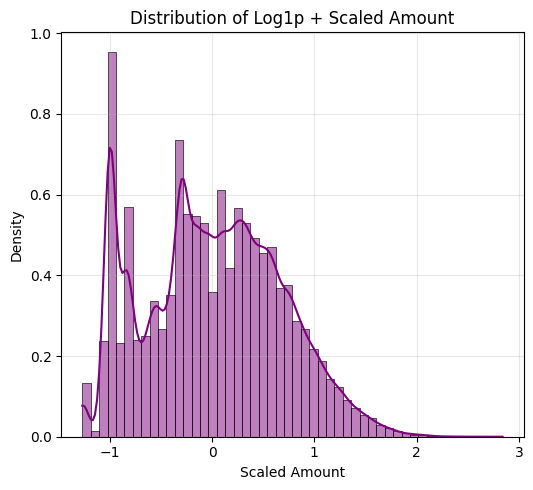

In [37]:
from sklearn.preprocessing import RobustScaler

# Apply log1p transformation first, then scale
crecard['Amount_log'] = np.log1p(crecard['Amount'])
scaler = RobustScaler()
crecard['Amount_scaled'] = scaler.fit_transform(crecard[['Amount_log']])
crecard = crecard.drop(['Amount', 'Amount_log'], axis=1)

# Visualize the distribution of log-transformed and scaled Amount
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(crecard['Amount_scaled'], bins=50, kde=True, color='purple', stat='density')
plt.title('Distribution of Log1p + Scaled Amount')
plt.xlabel('Scaled Amount')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


- Plots (again)

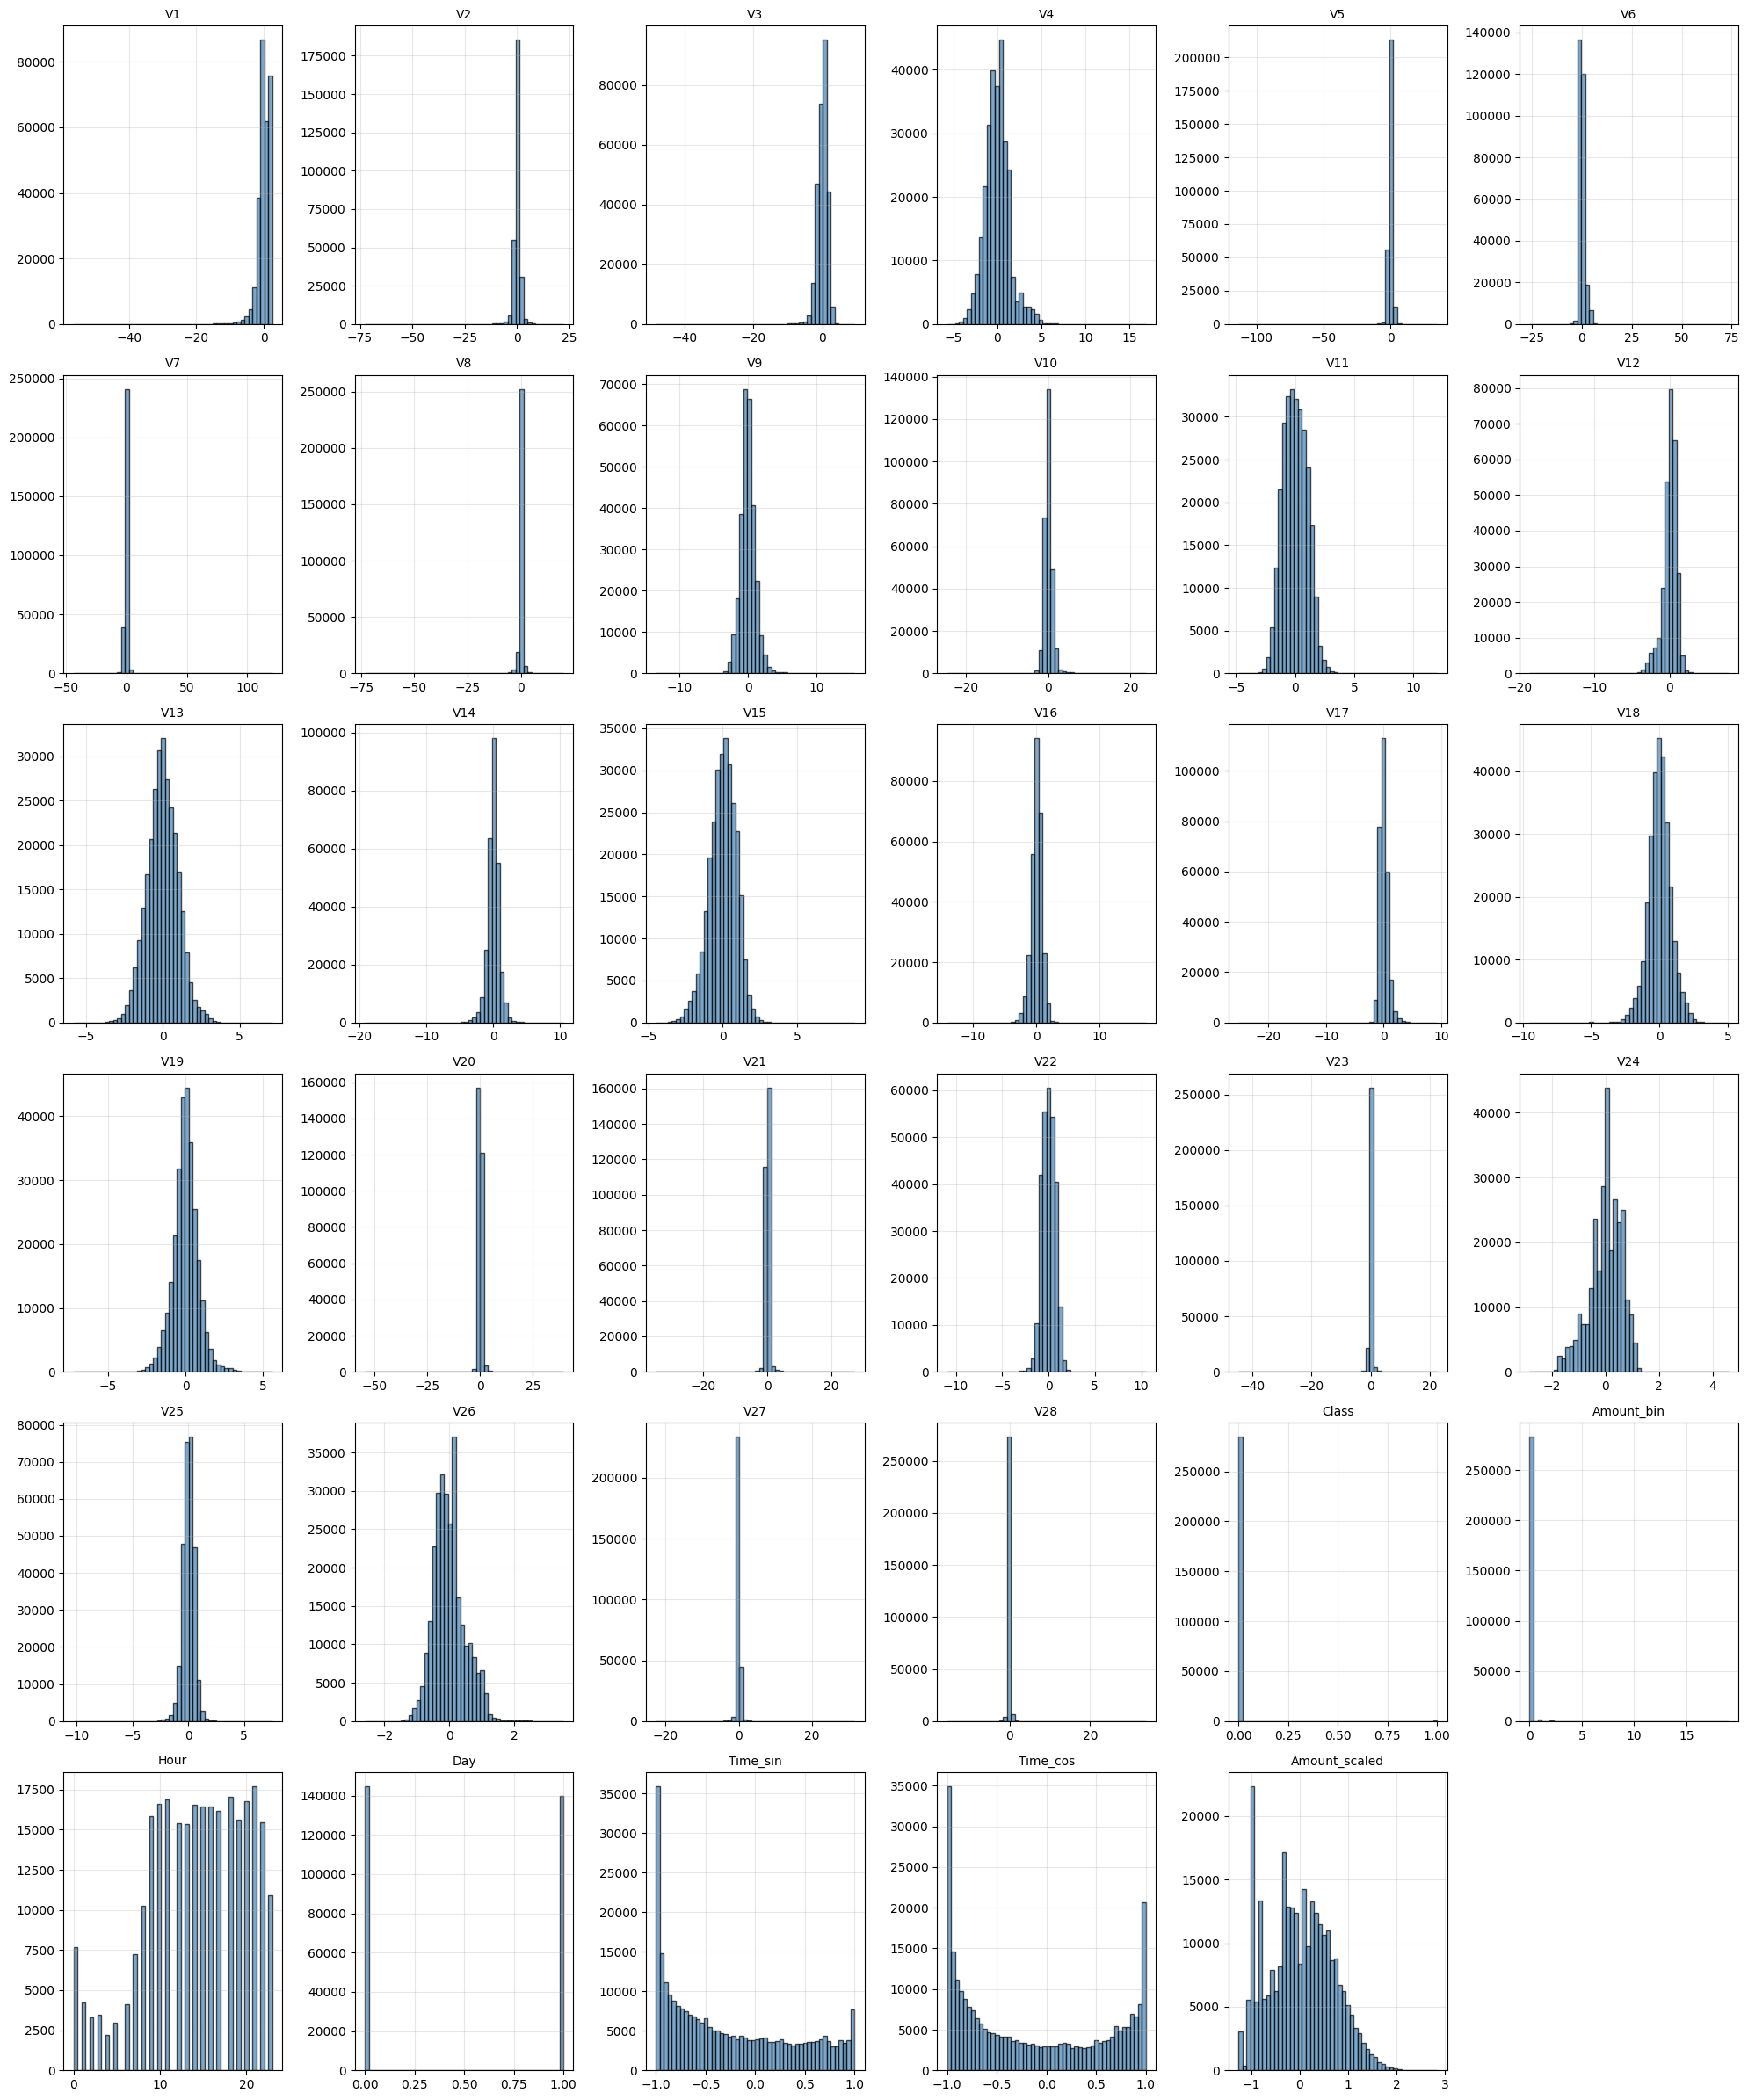

In [38]:
# Plot histograms for all variables
fig, axes = plt.subplots(6, 6, figsize=(20, 24))
axes = axes.ravel()

for idx, col in enumerate(crecard.columns):
    if idx < len(axes):
        axes[idx].hist(crecard[col], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
        axes[idx].set_title(f'{col}', fontsize=10)
        axes[idx].grid(True, alpha=0.3)

# Remove empty subplots
for idx in range(len(crecard.columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

- Test / train split

In [39]:
from sklearn.model_selection import train_test_split
crecard['Class'] = crecard['Class'].astype('category')
# Separate features and target
X = crecard.drop(['Class', 'Hour', 'Day', 'Amount_bin'], axis=1)
y = crecard['Class']

# Stratified train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=88, stratify=y
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"\nTraining set class distribution:")
print(f"Normal: {(y_train == 0).sum():,} ({(y_train == 0).mean()*100:.3f}%)")
print(f"Fraud: {(y_train == 1).sum():,} ({(y_train == 1).mean()*100:.3f}%)")
print(f"\nTest set class distribution:")
print(f"Normal: {(y_test == 0).sum():,} ({(y_test == 0).mean()*100:.3f}%)")
print(f"Fraud: {(y_test == 1).sum():,} ({(y_test == 1).mean()*100:.3f}%)")


Training set: 227,845 samples
Test set: 56,962 samples

Training set class distribution:
Normal: 227,451 (99.827%)
Fraud: 394 (0.173%)

Test set class distribution:
Normal: 56,864 (99.828%)
Fraud: 98 (0.172%)


## Model training

- With some dirty models

In [40]:
from sklearn.metrics import average_precision_score, classification_report, confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

models = {
    'XGBoost': XGBClassifier(n_estimators=200, max_depth=8, learning_rate=0.05, colsample_bytree=0.9, n_jobs=-1, scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=200, max_depth=8, learning_rate=0.05, colsample_bytree=0.9, n_jobs=-1, class_weight='balanced', random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, max_depth=8, n_jobs=-1, class_weight='balanced', random_state=42),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=500, class_weight='balanced', n_jobs=-1, random_state=42)
}

OPTIMAL_THRESHOLDS = {
    'RandomForest': 0.8118,
    'LightGBM': 0.9504,
    'XGBoost': 0.9900,
    'LogisticRegression': 0.9900
}

results = {}
for name, clf in models.items():
    print(f"--- Training and evaluating {name} ---") 
    pipe = make_pipeline(
        SMOTE(random_state=42),
        clf
    )
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.predict_proba(X_test)[:, 1]
    
    threshold = OPTIMAL_THRESHOLDS.get(name, 0.5) 
    y_pred = (y_pred_proba >= threshold).astype(int)

    auprc = average_precision_score(y_test, y_pred_proba)
    auroc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred, digits=3)
    conf = confusion_matrix(y_test, y_pred)
    
    # Compute precision-recall curve and find closest threshold
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    # Find the index of the threshold closest to the chosen threshold
    if len(thresholds) > 0:
        best_idx = (np.abs(thresholds - threshold)).argmin()
        recall_at_thresh = recall[best_idx]
        precision_at_thresh = precision[best_idx]
    else:
        recall_at_thresh = None
        precision_at_thresh = None

    results[name] = {
        'AUPRC': auprc,
        'AUROC': auroc,
        'Recall': recall_at_thresh,
        'Precision': precision_at_thresh,
        'Threshold': threshold,
        'Report': report,
        'Confusion': conf,
        'y_pred_proba': y_pred_proba 
    }

for name, res in results.items():
    print(f"{name}: Recall={res['Recall']:.3f}, Precision={res['Precision']:.3f}, AUPRC={res['AUPRC']:.3f}, AUROC={res['AUROC']:.3f}, Threshold={res['Threshold']:.3f}")
    print(res['Report'])
    print(res['Confusion'])

--- Training and evaluating XGBoost ---


c:\Users\ducho\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:04:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Training and evaluating LightGBM ---
[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
--- Training and evaluating RandomForest ---
--- Training and evaluating LogisticRegression ---
XGBoost: Recall=0.847, Precision=0.922, AUPRC=0.853, AUROC=0.960, Threshold=0.990
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     56864
           1      0.922     0.847     0.883        98

    accuracy                          1.000     56962
   macro avg      0.961     0.923     0.941     56962
weighted avg      1.000     1.000     1.000     56962

[[56857     

- PR curve

Legend Colors:
  blue     - XGBoost
  red      - LightGBM
  green    - RandomForest
  orange   - LogisticRegression



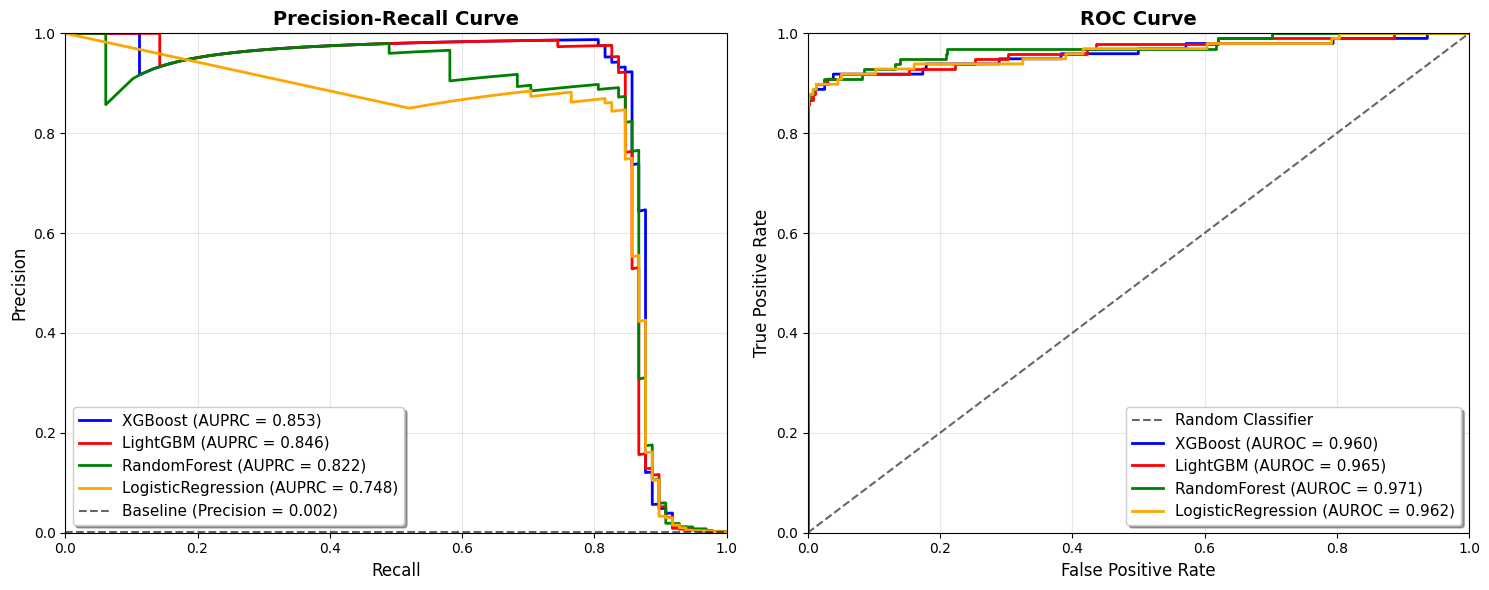


SUMMARY OF MODEL PERFORMANCE
Model           AUPRC    AUROC    Precision  Recall   Threshold 
--------------------------------------------------------------------------------
XGBoost         0.853    0.960    0.922      0.847    0.990     
LightGBM        0.846    0.965    0.912      0.847    0.950     
RandomForest    0.822    0.971    0.792      0.857    0.812     
LogisticRegression 0.748    0.962    0.556      0.867    0.990     


In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

colors = ['blue', 'red', 'green', 'orange']
model_names = list(results.keys())

print("Legend Colors:")
for i, name in enumerate(model_names):
    print(f"  {colors[i]:<8} - {name}")
print()

ax1.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
ax1.set_xlabel('Recall', fontsize=12)
ax1.set_ylabel('Precision', fontsize=12)

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)

ax2.plot([0, 1], [0, 1], 'k--', alpha=0.6, label='Random Classifier')

for i, name in enumerate(results.keys()):
    y_pred_proba = results[name]['y_pred_proba']
    
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
    auprc = results[name]['AUPRC']
    ax1.plot(recall, precision, color=colors[i], linewidth=2, 
             label=f'{name} (AUPRC = {auprc:.3f})')
    
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
    auroc = results[name]['AUROC']
    ax2.plot(fpr, tpr, color=colors[i], linewidth=2, 
             label=f'{name} (AUROC = {auroc:.3f})')

baseline_precision = (y_test == 1).sum() / len(y_test)
ax1.axhline(y=baseline_precision, color='k', linestyle='--', alpha=0.6, 
            label=f'Baseline (Precision = {baseline_precision:.3f})')

ax1.legend(loc='lower left', fontsize=11, frameon=True, fancybox=True, shadow=True)
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])

ax2.legend(loc='lower right', fontsize=11, frameon=True, fancybox=True, shadow=True)
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("SUMMARY OF MODEL PERFORMANCE")
print("="*80)
print(f"{'Model':<15} {'AUPRC':<8} {'AUROC':<8} {'Precision':<10} {'Recall':<8} {'Threshold':<10}")
print("-"*80)

for name, res in results.items():
    print(f"{name:<15} {res['AUPRC']:<8.3f} {res['AUROC']:<8.3f} {res['Precision']:<10.3f} {res['Recall']:<8.3f} {res['Threshold']:<10.3f}")